In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#get model duration
import time
from datetime import date

In [126]:
df = pd.read_csv('/Users/markoglodovic/Downloads/avocado-2.csv')

In [127]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [129]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [130]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [131]:
# ldf.dtypeset's change 'date' data type from 'object' to 'datetime':
df['Date']=pd.to_datetime(df['Date'])

In [132]:
df = df[df['Date'] < '2018-01-01']

In [133]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [134]:
# we have total value that we dont need, so we will drop it
df = df[df['region'].str.contains('TotalUS')==False]

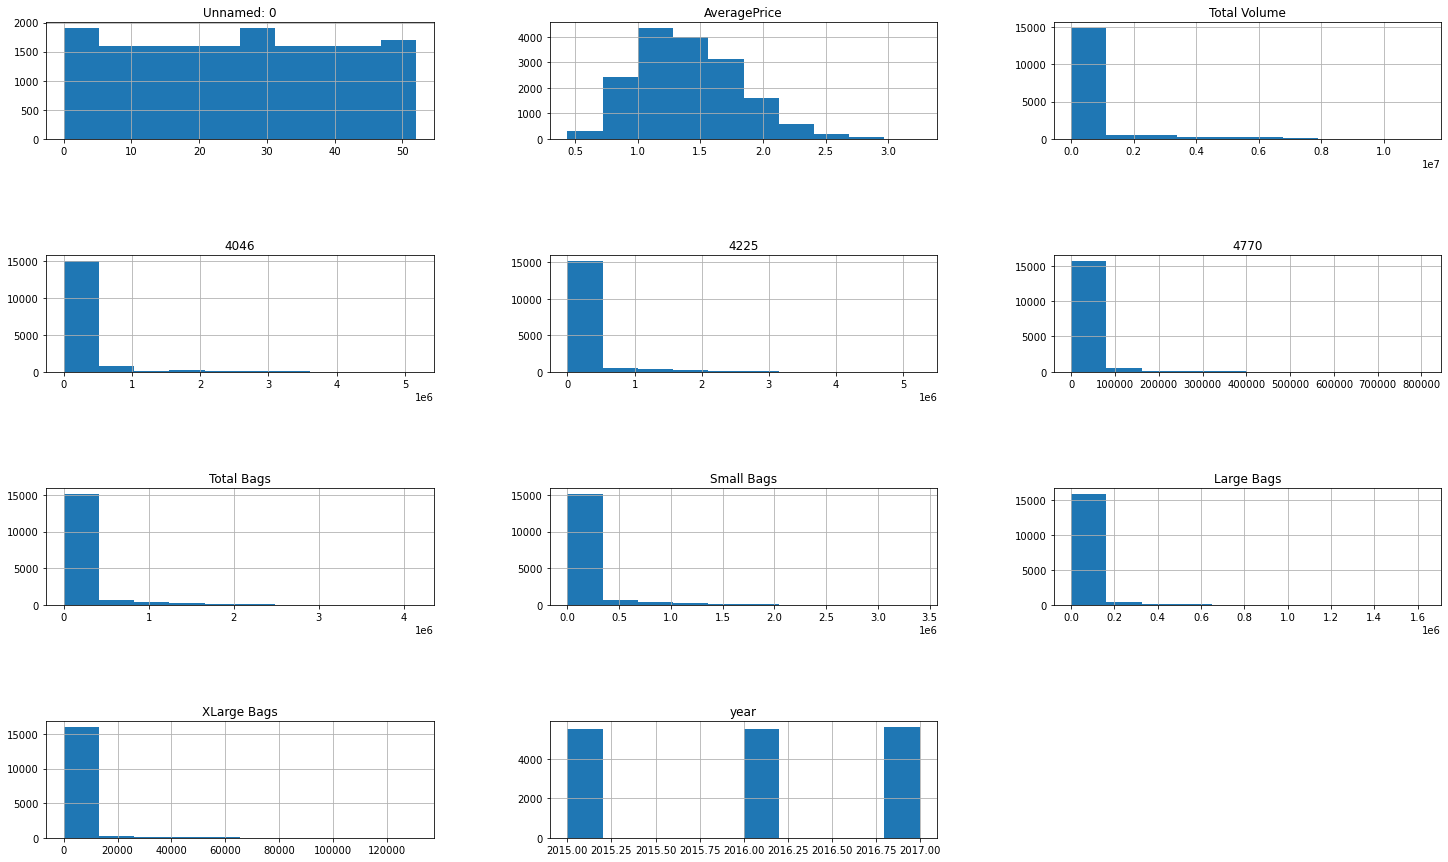

In [135]:
df.hist(figsize=(25, 15))
plt.subplots_adjust(hspace=1)

In [136]:
de = df.groupby(["region"])["Total Volume"].sum()

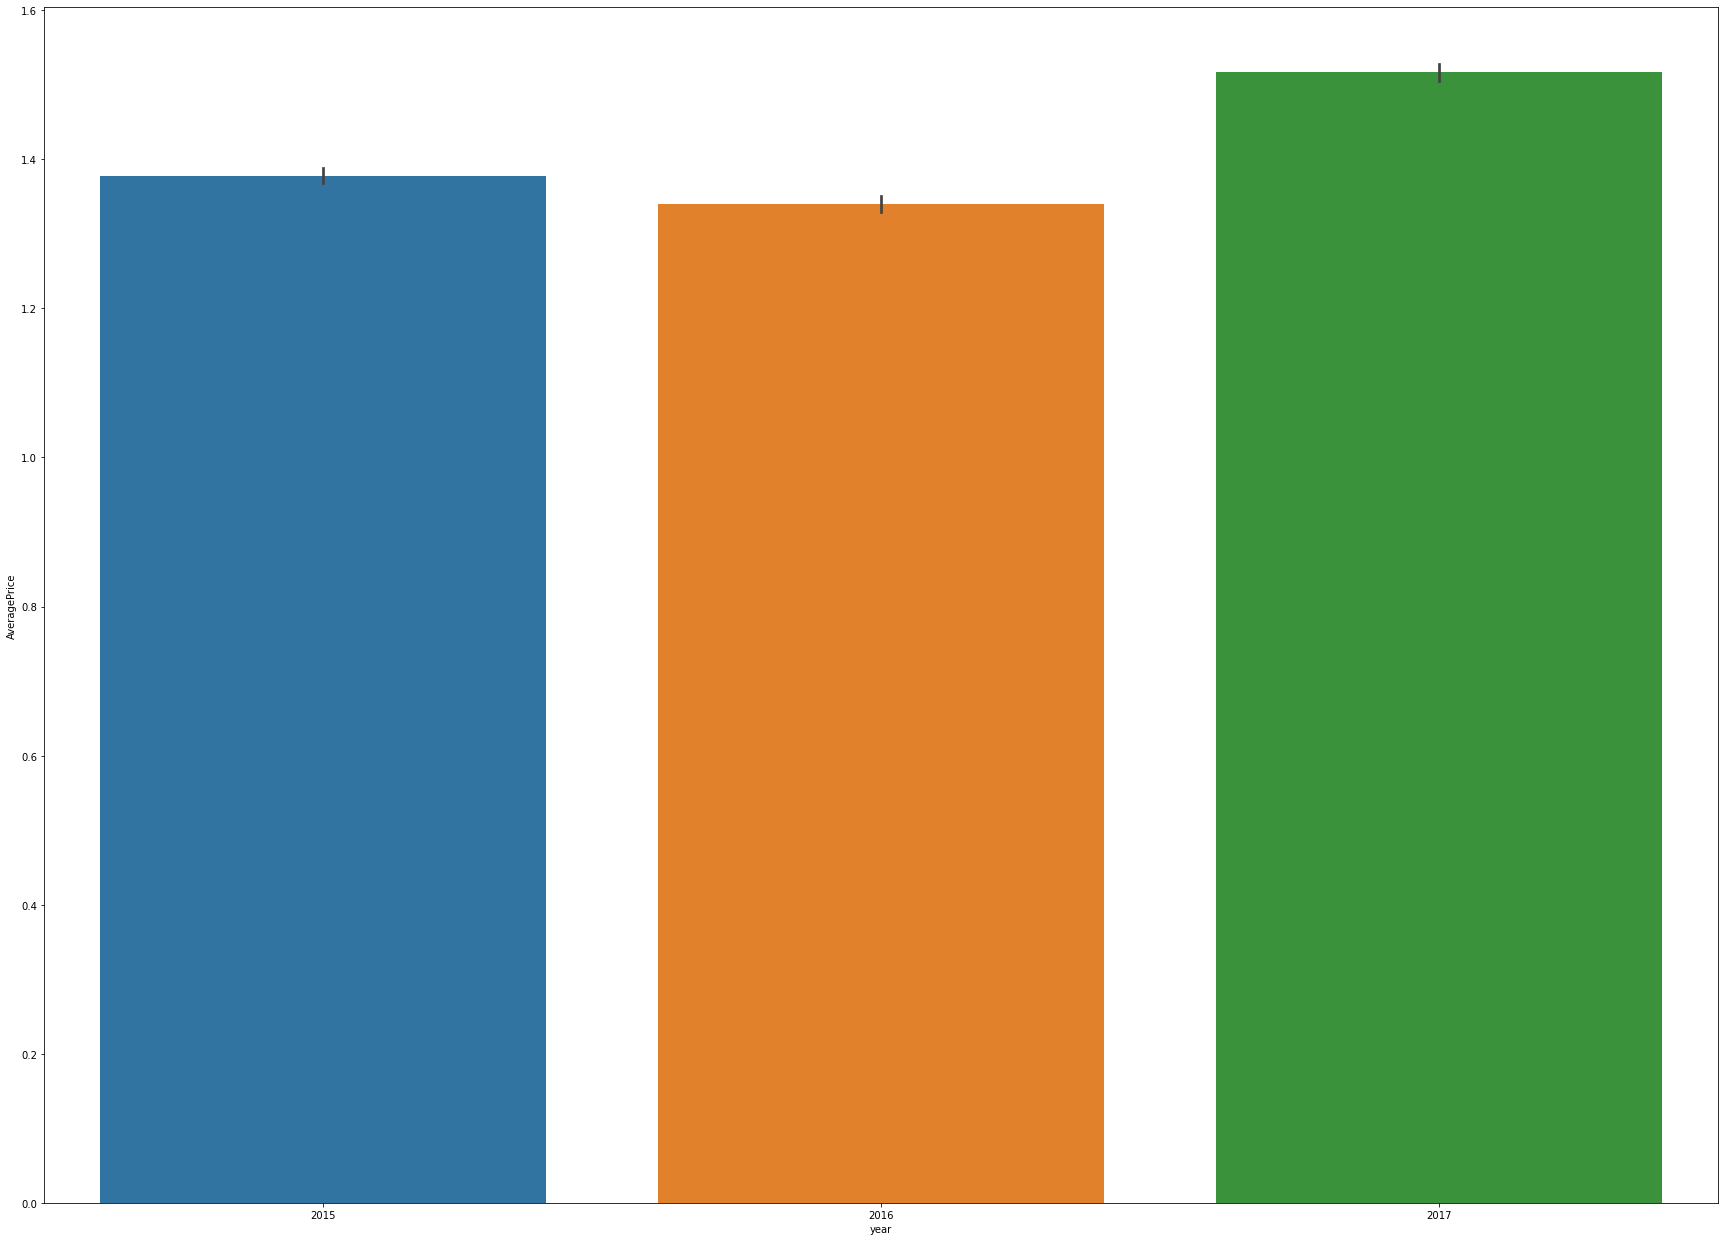

In [137]:
fig, ax = plt.subplots(figsize=(30, 22))
ax = sns.barplot(x="year", y="AveragePrice", data=df)

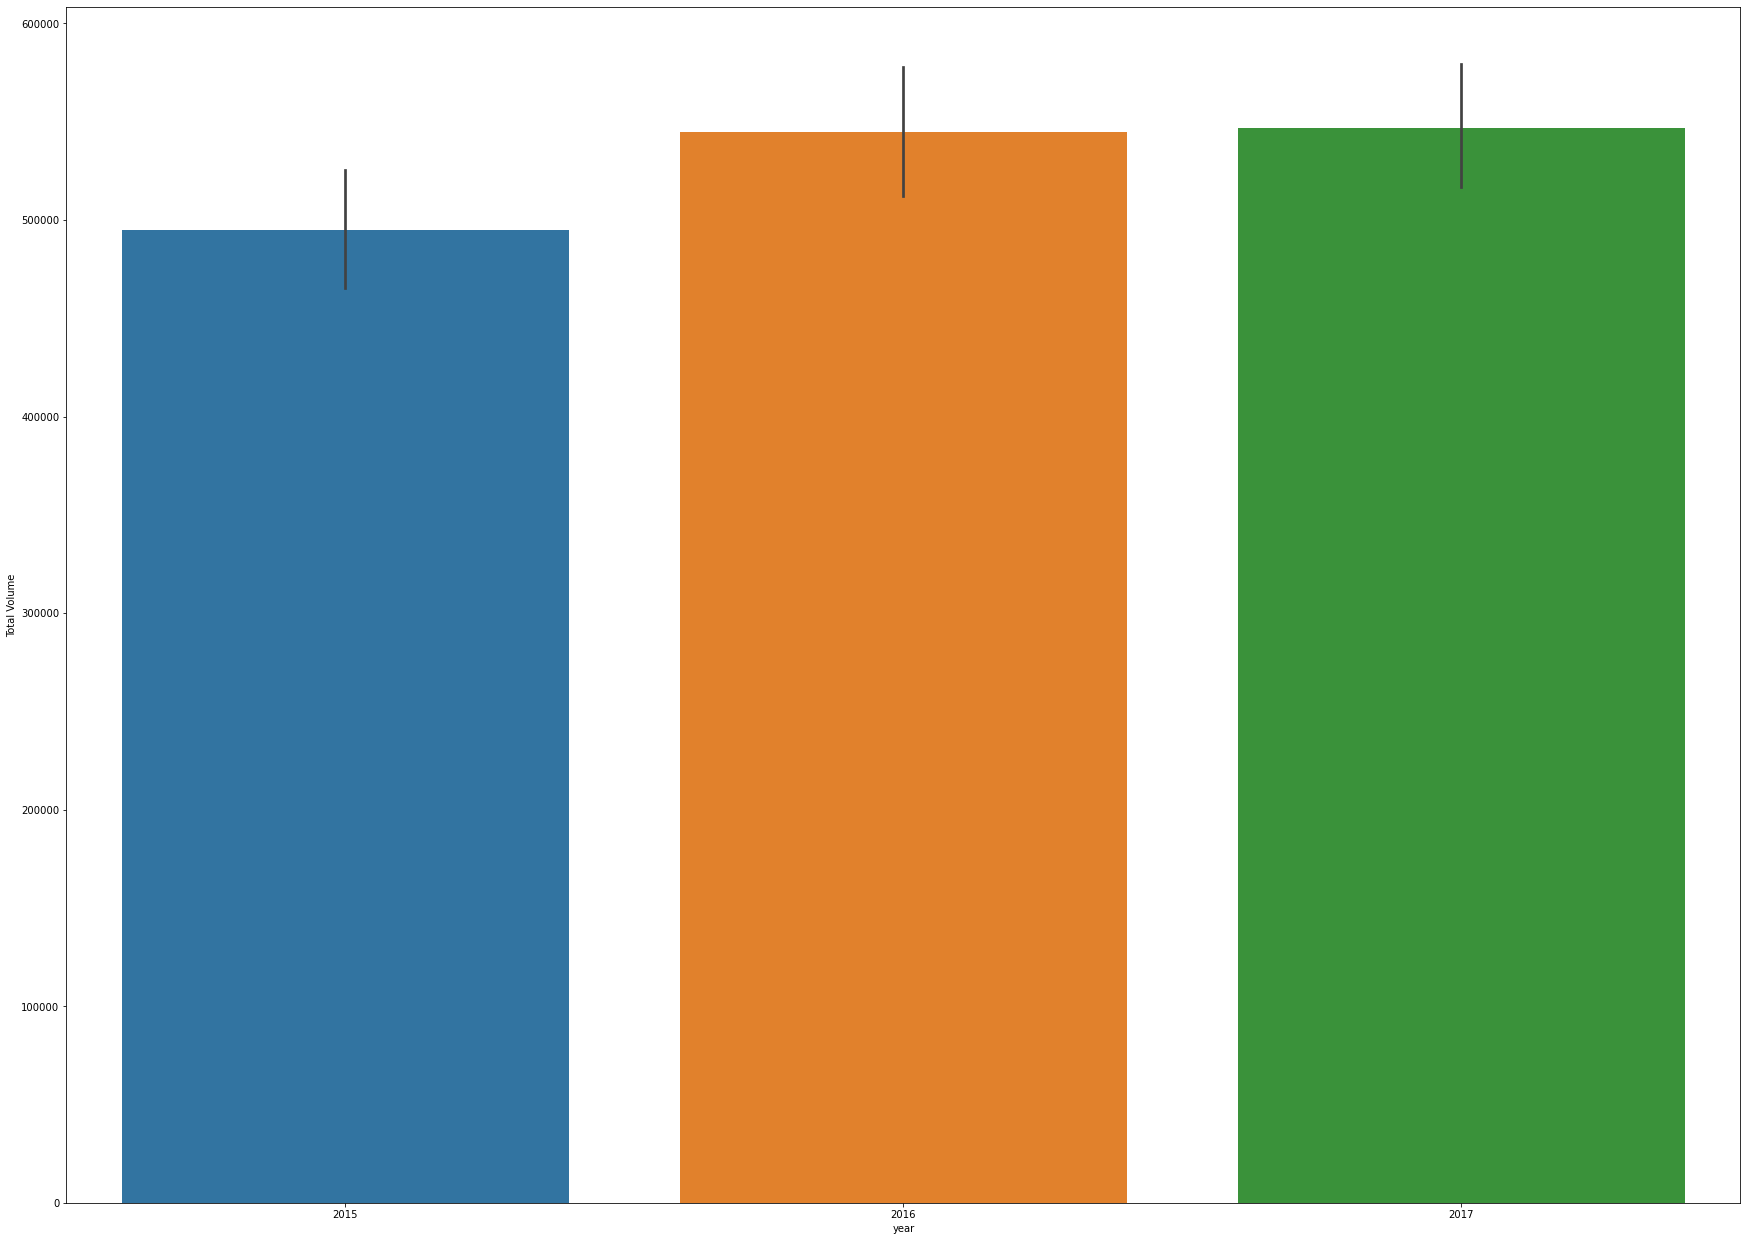

In [161]:
fig, ax = plt.subplots(figsize=(30, 22))
ax = sns.barplot(x="year", y="Total Volume", data=df)

In [138]:
df['month'] = pd.to_datetime(df['Date']).dt.to_period('M')

[Text(0, 0, '2015-01-31'),
 Text(1, 0, '2015-02-28'),
 Text(2, 0, '2015-03-31'),
 Text(3, 0, '2015-04-30'),
 Text(4, 0, '2015-05-31'),
 Text(5, 0, '2015-06-30'),
 Text(6, 0, '2015-07-31'),
 Text(7, 0, '2015-08-31'),
 Text(8, 0, '2015-09-30'),
 Text(9, 0, '2015-10-31'),
 Text(10, 0, '2015-11-30'),
 Text(11, 0, '2015-12-31'),
 Text(12, 0, '2016-01-31'),
 Text(13, 0, '2016-02-29'),
 Text(14, 0, '2016-03-31'),
 Text(15, 0, '2016-04-30'),
 Text(16, 0, '2016-05-31'),
 Text(17, 0, '2016-06-30'),
 Text(18, 0, '2016-07-31'),
 Text(19, 0, '2016-08-31'),
 Text(20, 0, '2016-09-30'),
 Text(21, 0, '2016-10-31'),
 Text(22, 0, '2016-11-30'),
 Text(23, 0, '2016-12-31'),
 Text(24, 0, '2017-01-31'),
 Text(25, 0, '2017-02-28'),
 Text(26, 0, '2017-03-31'),
 Text(27, 0, '2017-04-30'),
 Text(28, 0, '2017-05-31'),
 Text(29, 0, '2017-06-30'),
 Text(30, 0, '2017-07-31'),
 Text(31, 0, '2017-08-31'),
 Text(32, 0, '2017-09-30'),
 Text(33, 0, '2017-10-31'),
 Text(34, 0, '2017-11-30'),
 Text(35, 0, '2017-12-31')]

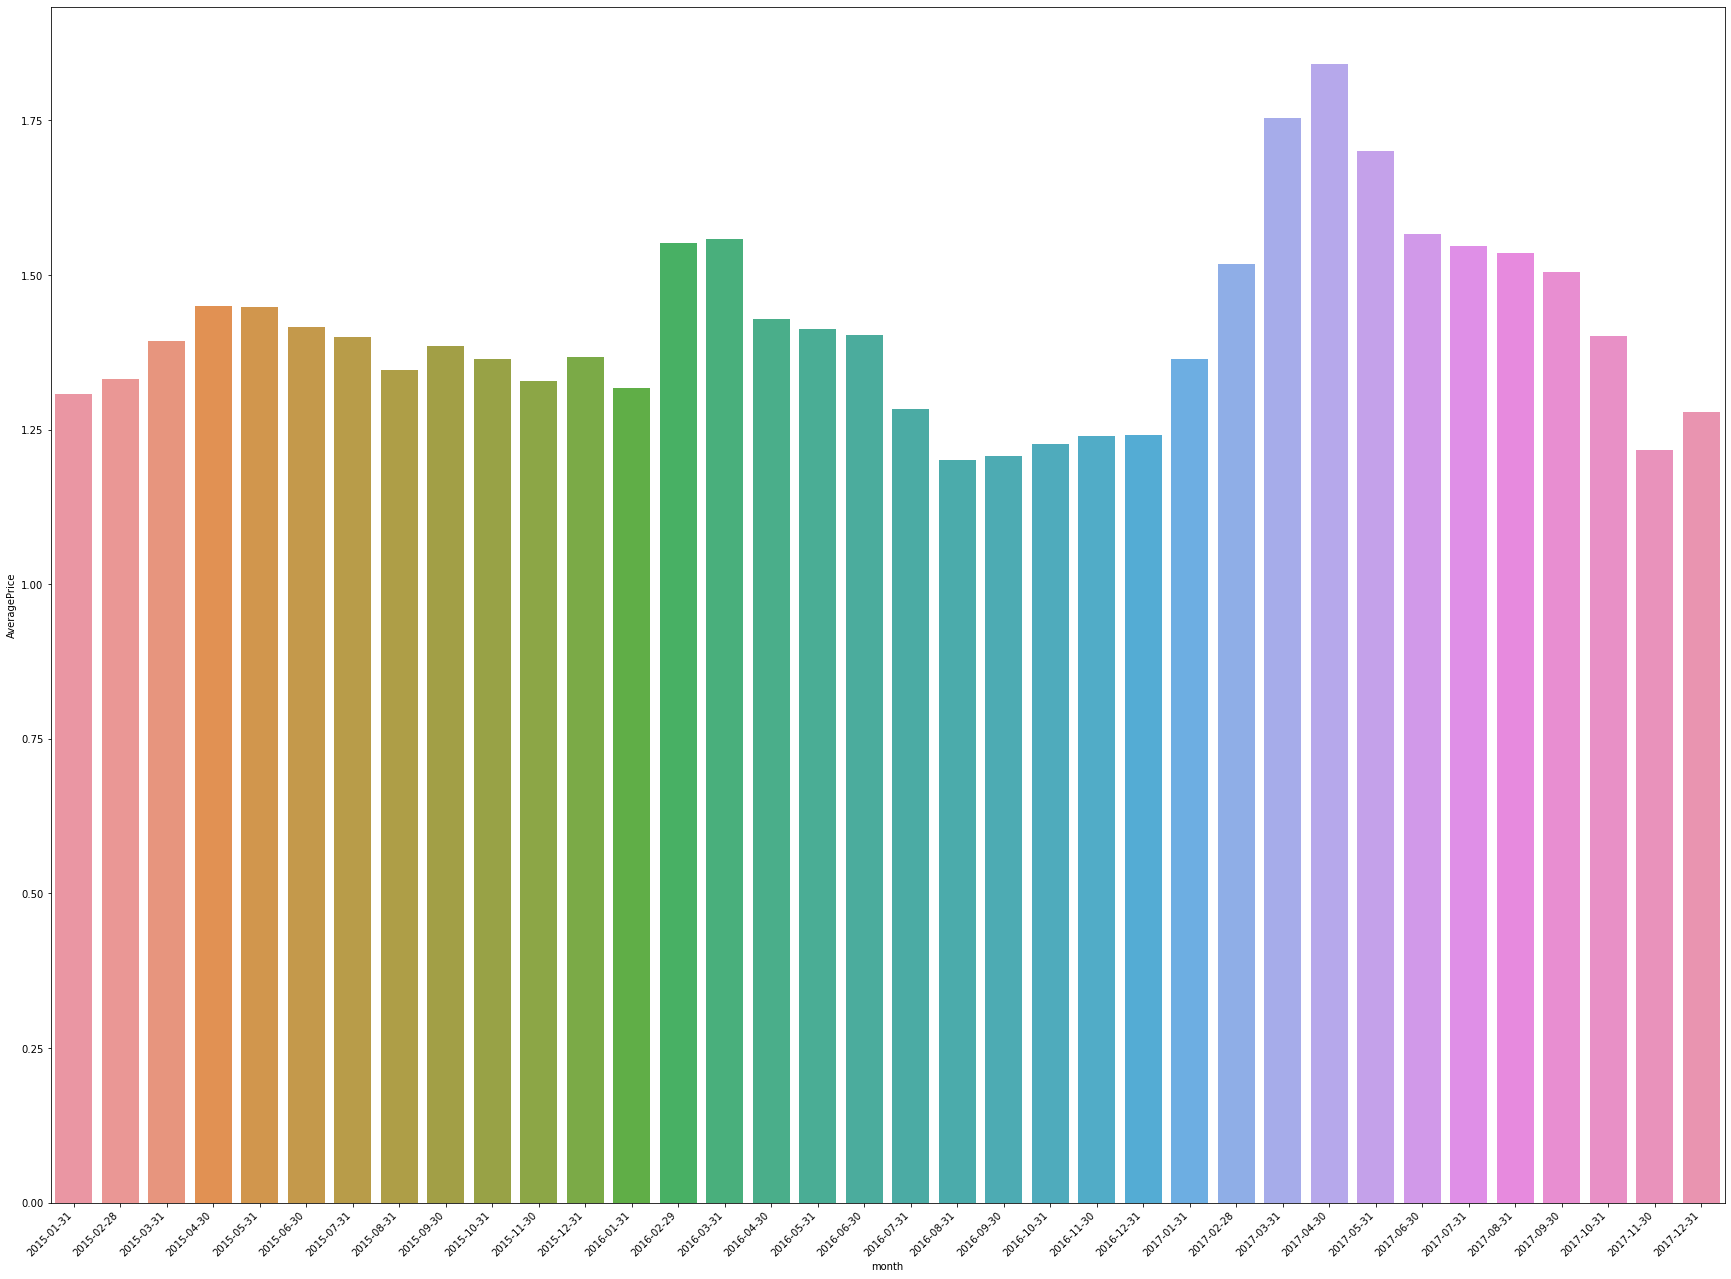

In [167]:
fig, ax = plt.subplots(figsize=(30, 22))
fig = sns.barplot(x = "month", y = "AveragePrice", data = df, 
                   ci = None, ax=ax)
x_dates = df['month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

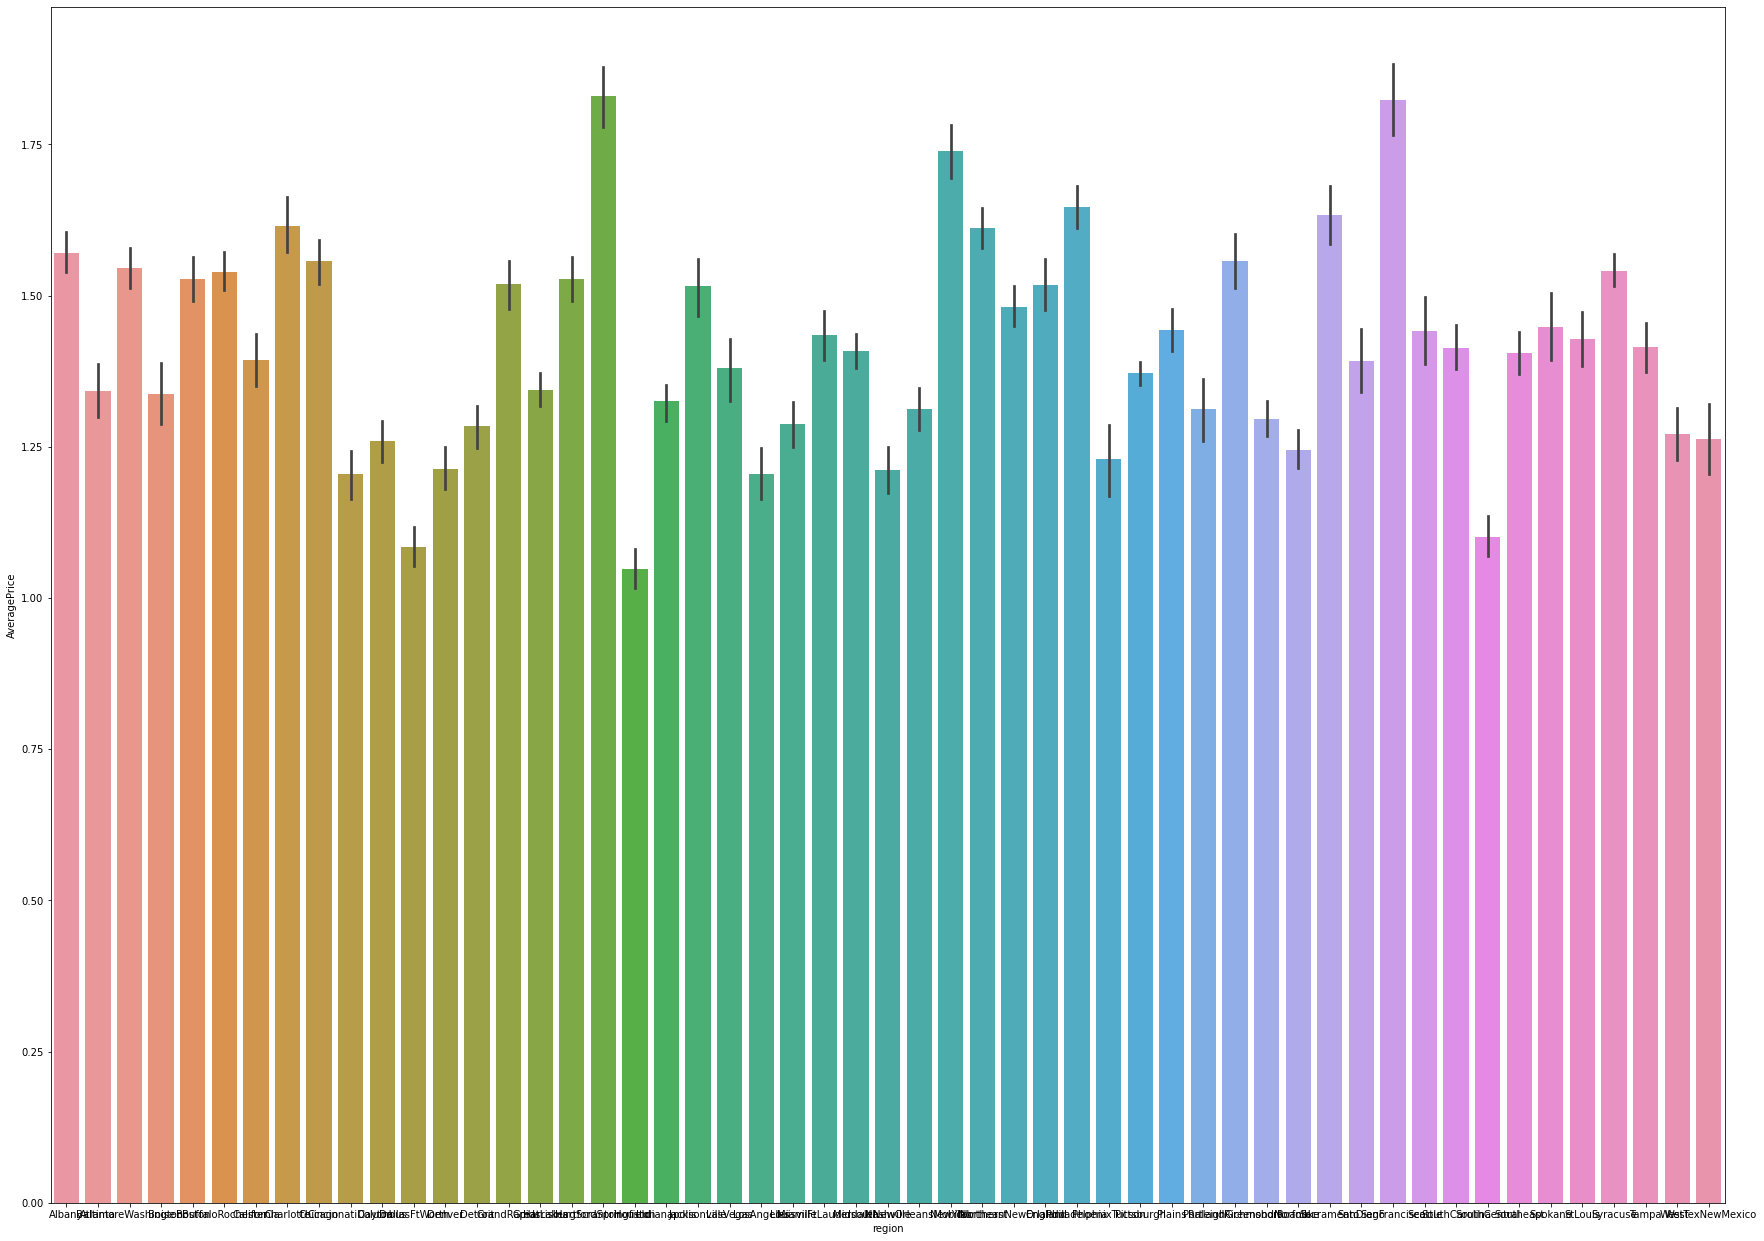

In [140]:
fig, ax = plt.subplots(figsize=(30, 22))
ax = sns.barplot(x="region", y="AveragePrice", data=df)

In [165]:
de.sort_values()

region
Syracuse               9.895680e+06
Boise                  1.319843e+07
Spokane                1.433938e+07
Albany                 1.452581e+07
Louisville             1.462544e+07
Pittsburgh             1.690483e+07
BuffaloRochester       2.083865e+07
Roanoke                2.255124e+07
Jacksonville           2.608160e+07
Columbus               2.714946e+07
Indianapolis           2.735472e+07
GrandRapids            2.764227e+07
StLouis                2.953517e+07
Charlotte              3.196965e+07
Nashville              3.209974e+07
HarrisburgScranton     3.790705e+07
RichmondNorfolk        3.823603e+07
CincinnatiDayton       4.092372e+07
NewOrleansMobile       4.163118e+07
RaleighGreensboro      4.341384e+07
HartfordSpringfield    4.618280e+07
LasVegas               4.988327e+07
Orlando                5.274576e+07
SouthCarolina          5.491769e+07
Detroit                5.739946e+07
Tampa                  5.936248e+07
NorthernNewEngland     6.489673e+07
Philadelphia         

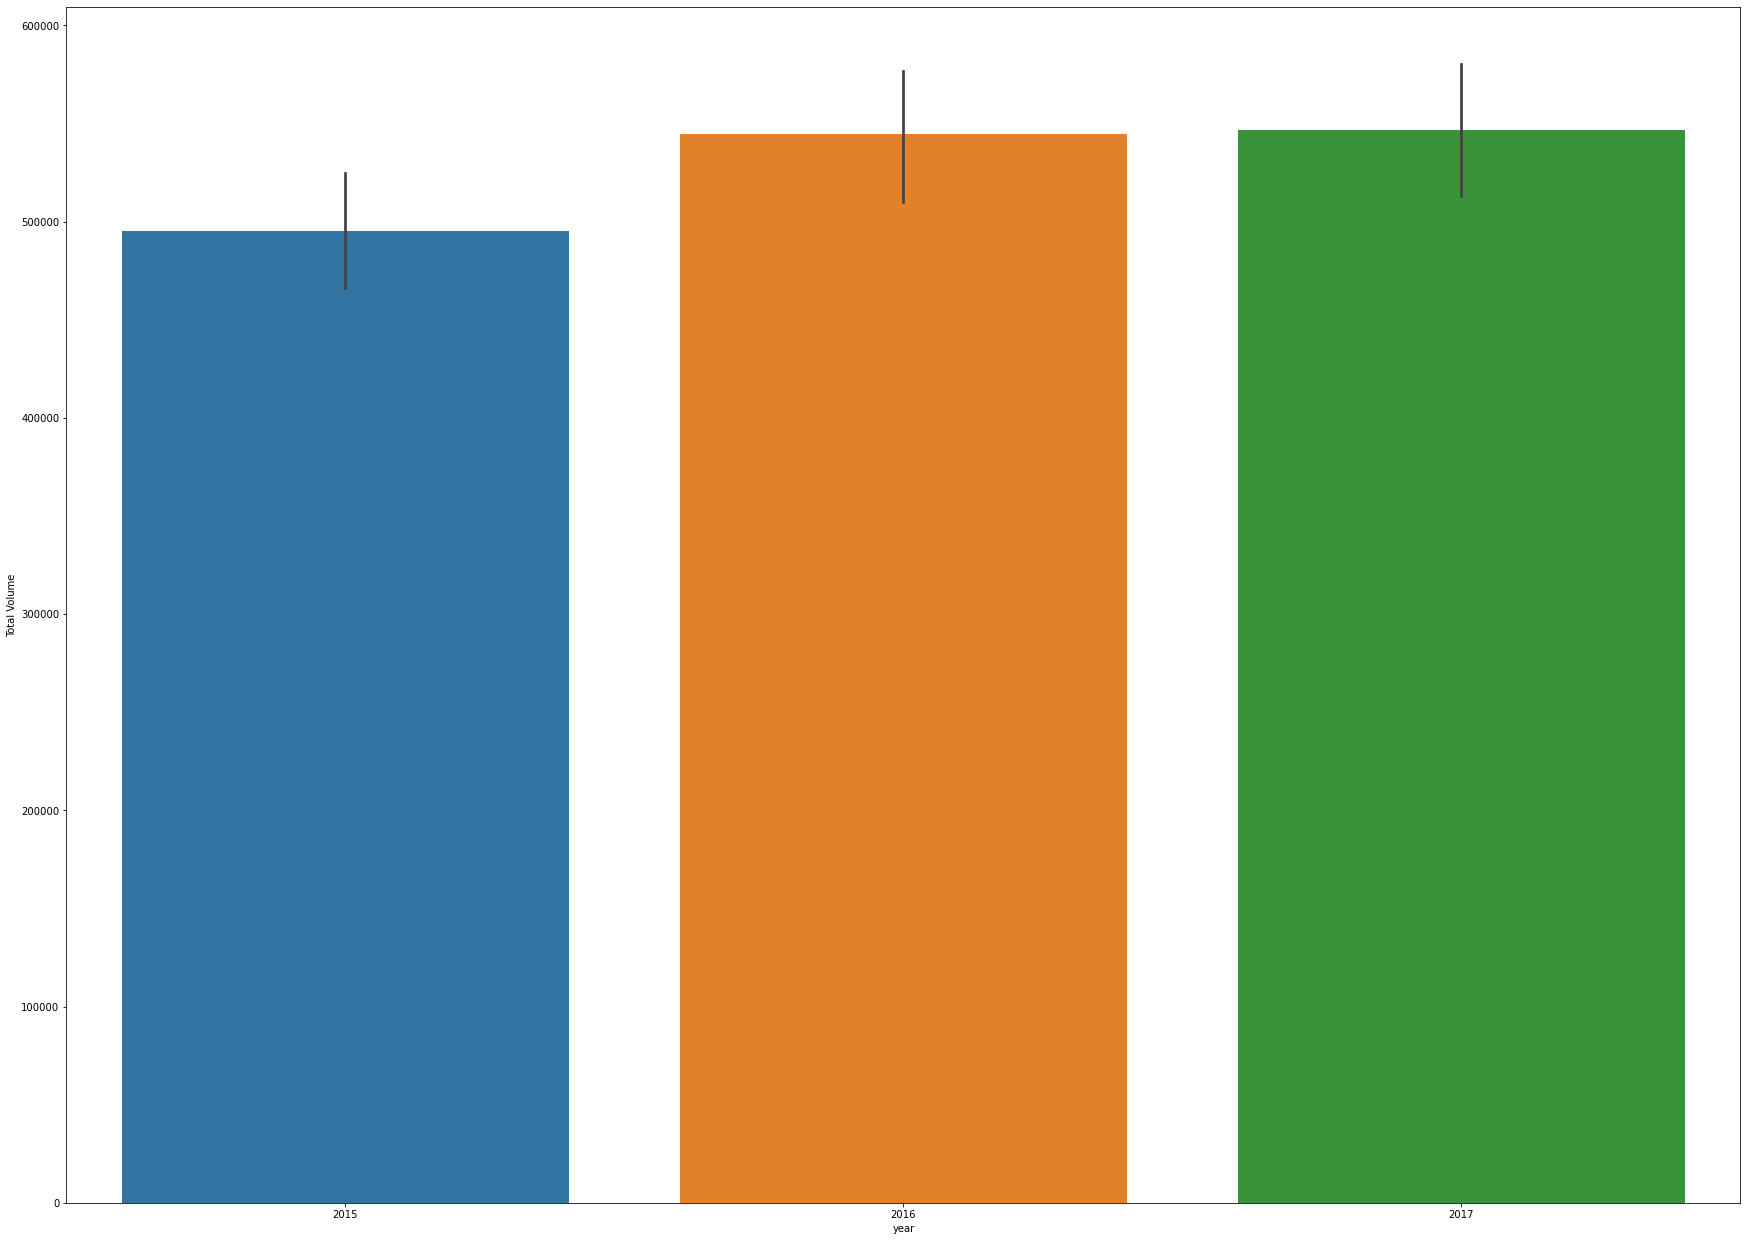

In [141]:
fig, ax = plt.subplots(figsize=(30, 22))
ax = sns.barplot(x="year", y="Total Volume", data=df)

[Text(0, 0, '2015-01-31'),
 Text(1, 0, '2015-02-28'),
 Text(2, 0, '2015-03-31'),
 Text(3, 0, '2015-04-30'),
 Text(4, 0, '2015-05-31'),
 Text(5, 0, '2015-06-30'),
 Text(6, 0, '2015-07-31'),
 Text(7, 0, '2015-08-31'),
 Text(8, 0, '2015-09-30'),
 Text(9, 0, '2015-10-31'),
 Text(10, 0, '2015-11-30'),
 Text(11, 0, '2015-12-31'),
 Text(12, 0, '2016-01-31'),
 Text(13, 0, '2016-02-29'),
 Text(14, 0, '2016-03-31'),
 Text(15, 0, '2016-04-30'),
 Text(16, 0, '2016-05-31'),
 Text(17, 0, '2016-06-30'),
 Text(18, 0, '2016-07-31'),
 Text(19, 0, '2016-08-31'),
 Text(20, 0, '2016-09-30'),
 Text(21, 0, '2016-10-31'),
 Text(22, 0, '2016-11-30'),
 Text(23, 0, '2016-12-31'),
 Text(24, 0, '2017-01-31'),
 Text(25, 0, '2017-02-28'),
 Text(26, 0, '2017-03-31'),
 Text(27, 0, '2017-04-30'),
 Text(28, 0, '2017-05-31'),
 Text(29, 0, '2017-06-30'),
 Text(30, 0, '2017-07-31'),
 Text(31, 0, '2017-08-31'),
 Text(32, 0, '2017-09-30'),
 Text(33, 0, '2017-10-31'),
 Text(34, 0, '2017-11-30'),
 Text(35, 0, '2017-12-31')]

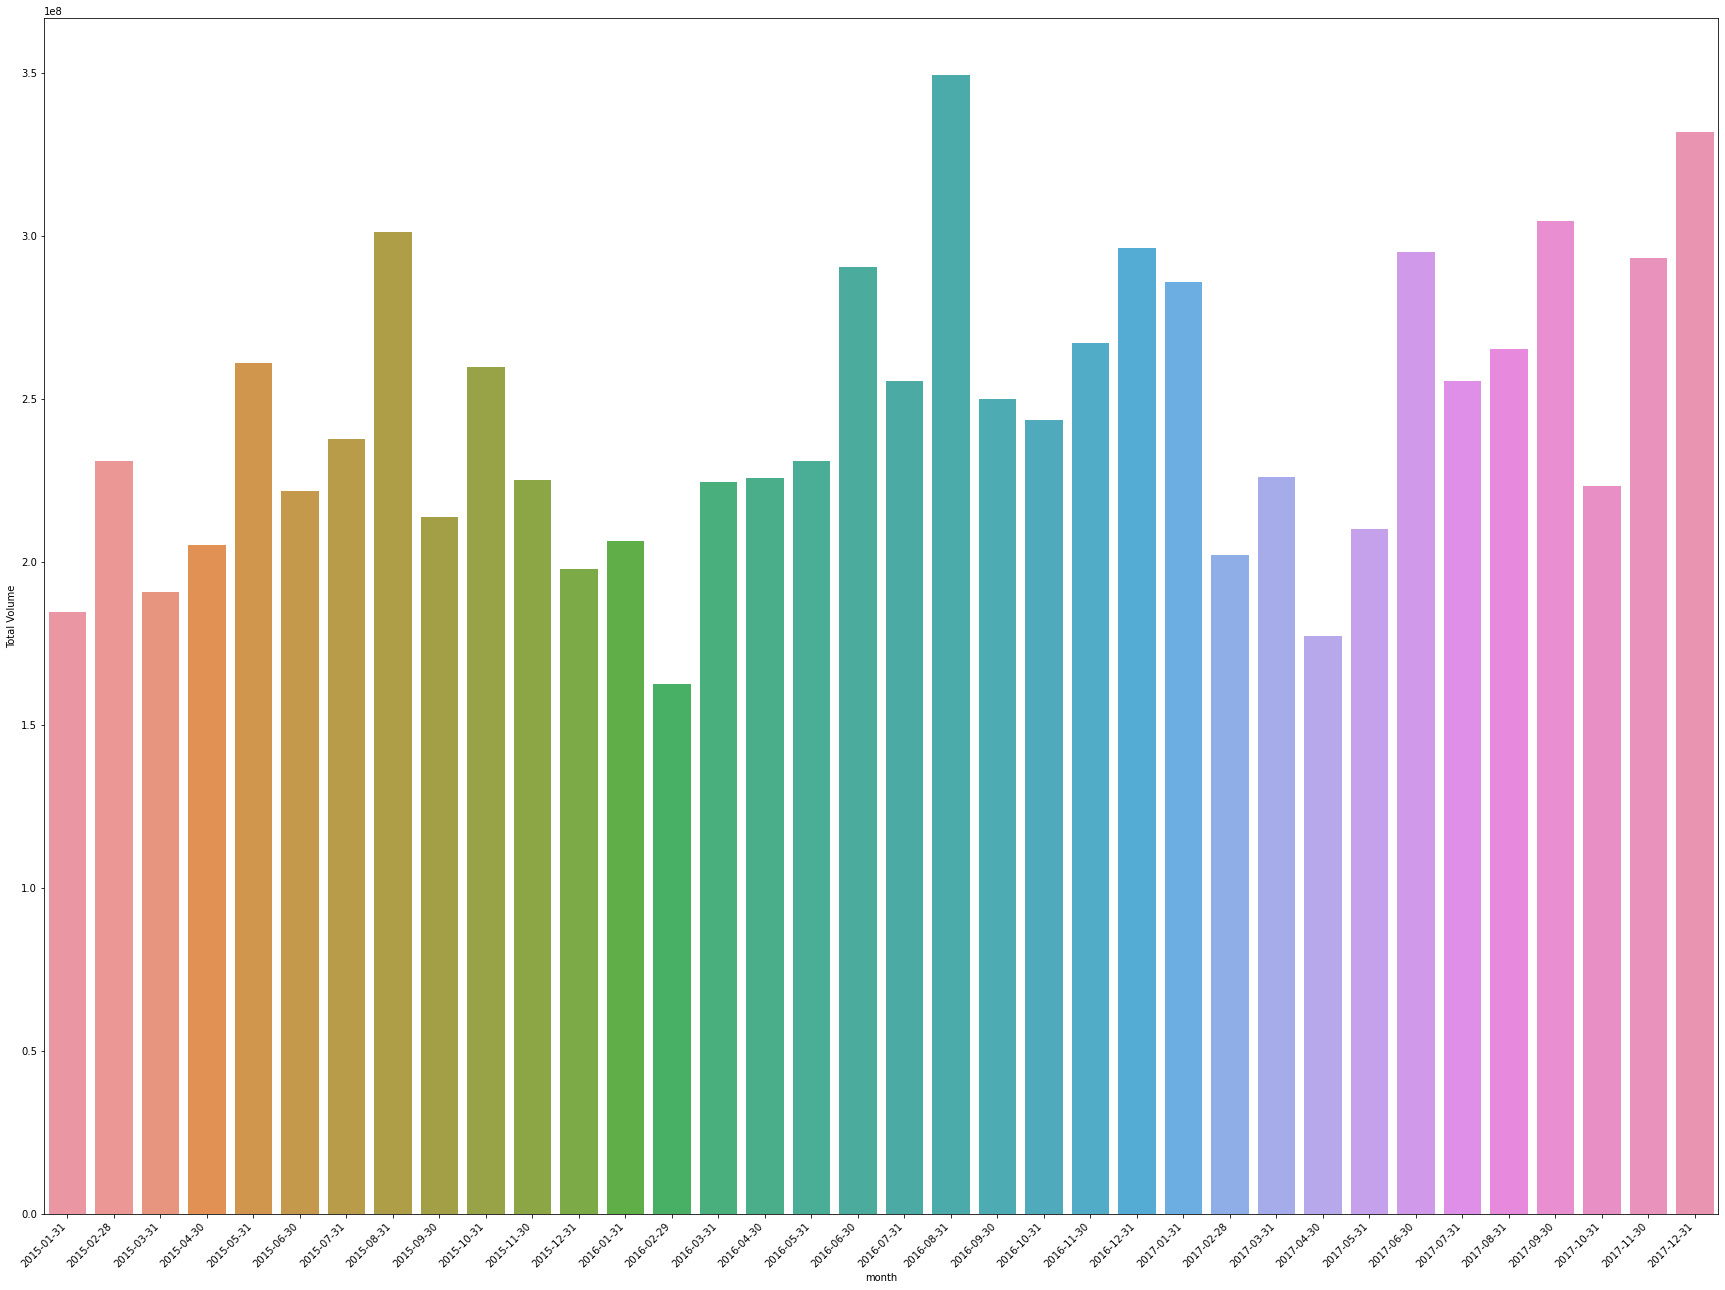

In [142]:
fig, ax = plt.subplots(figsize=(30, 22))
fig = sns.barplot(x = "month", y = "Total Volume", data = df, 
                  estimator = sum, ci = None, ax=ax)
x_dates = df['month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

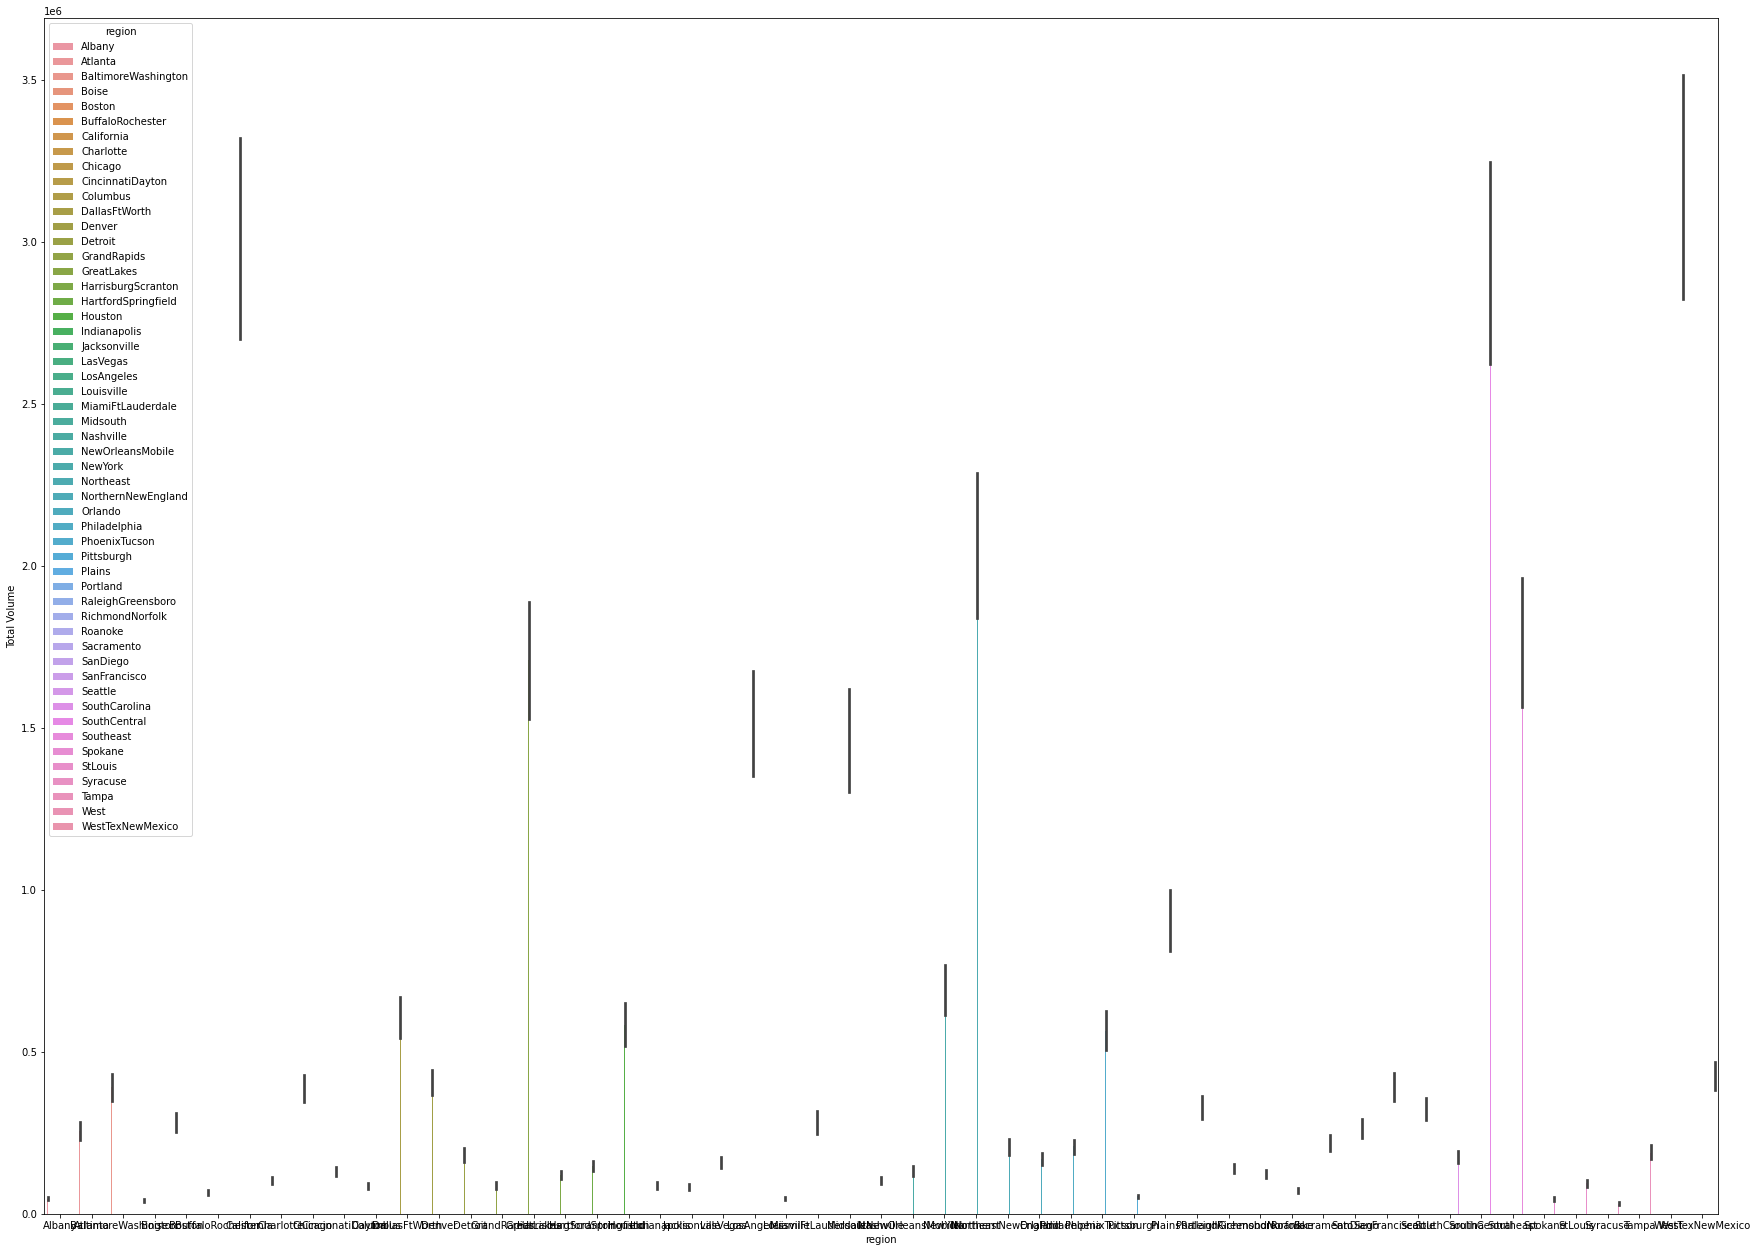

In [163]:
fig, ax = plt.subplots(figsize=(30, 22))
ax = sns.barplot(x="region", y="Total Volume",hue="region", data=df)


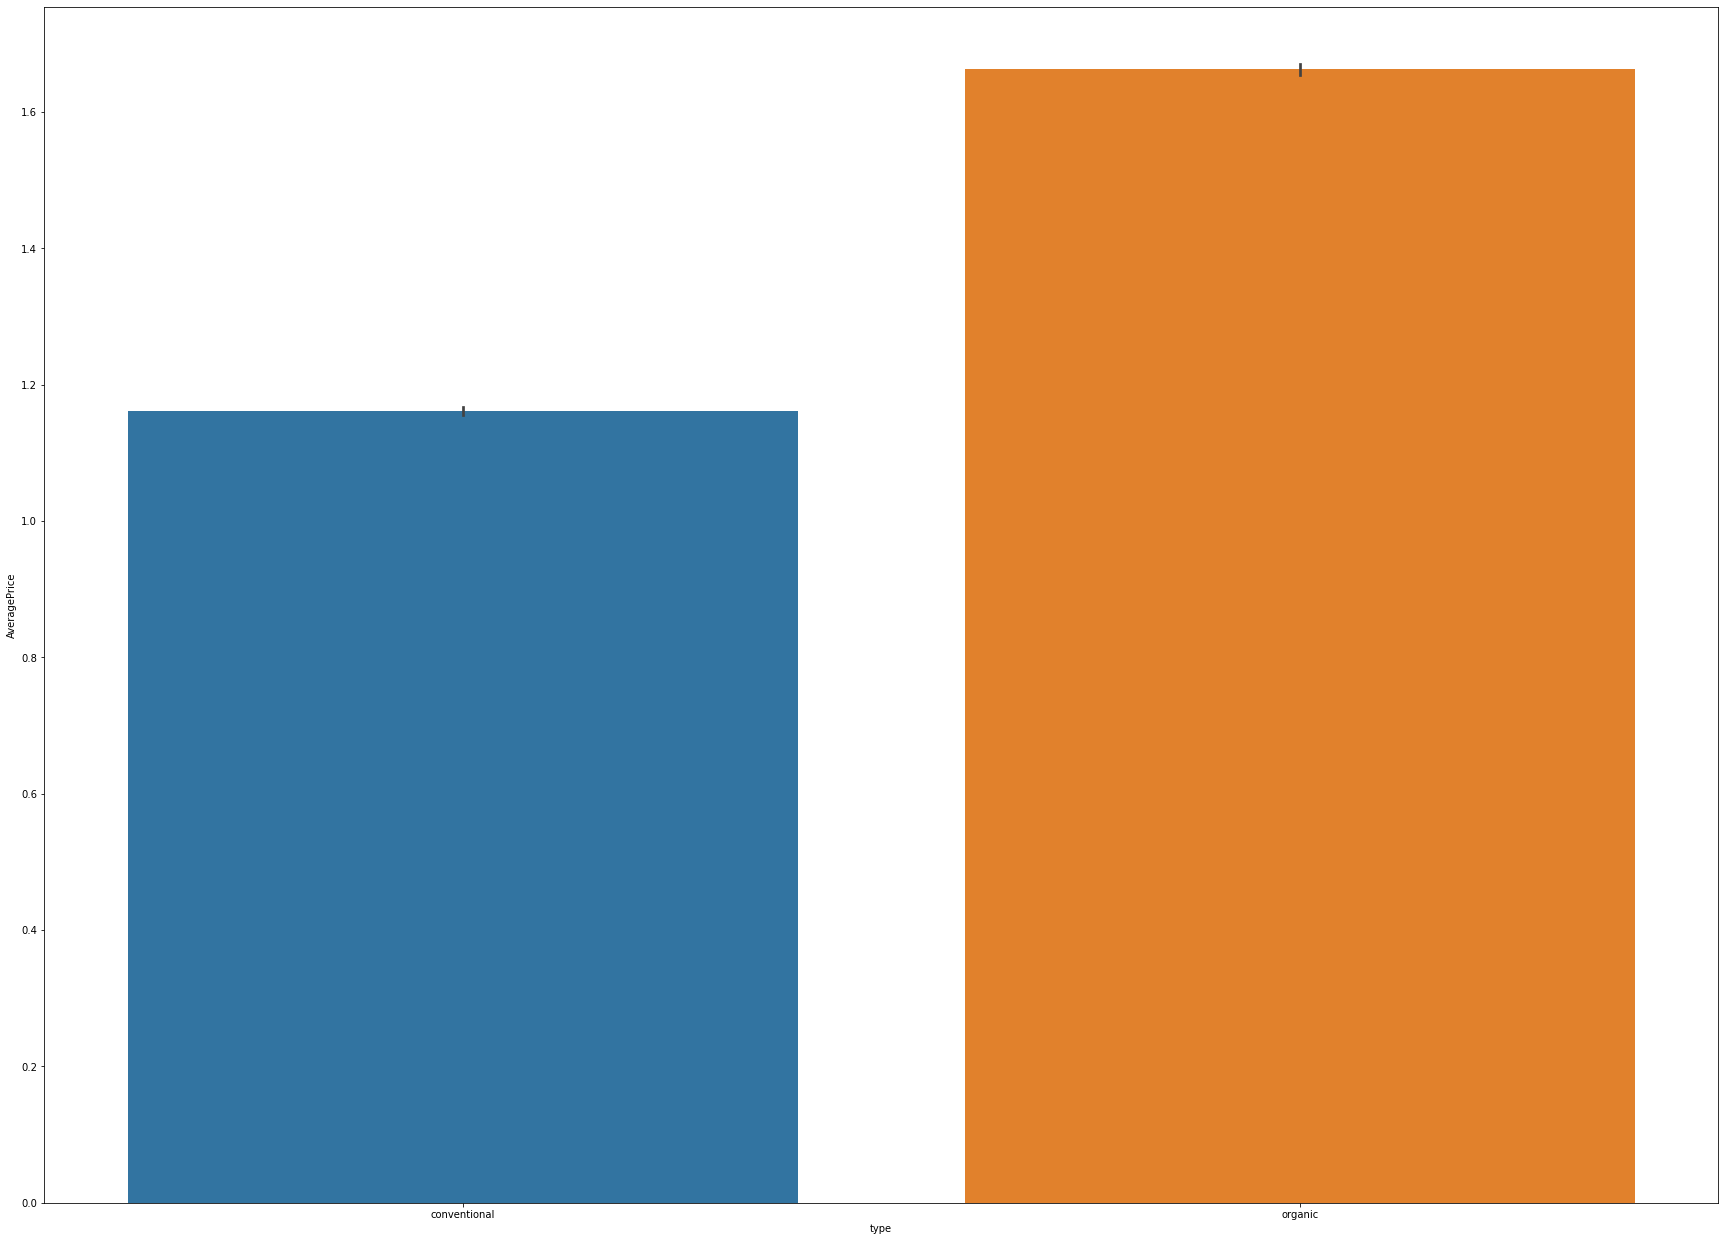

In [144]:
fig, ax = plt.subplots(figsize=(30, 22))
ax = sns.barplot(x="type", y="AveragePrice", data=df)

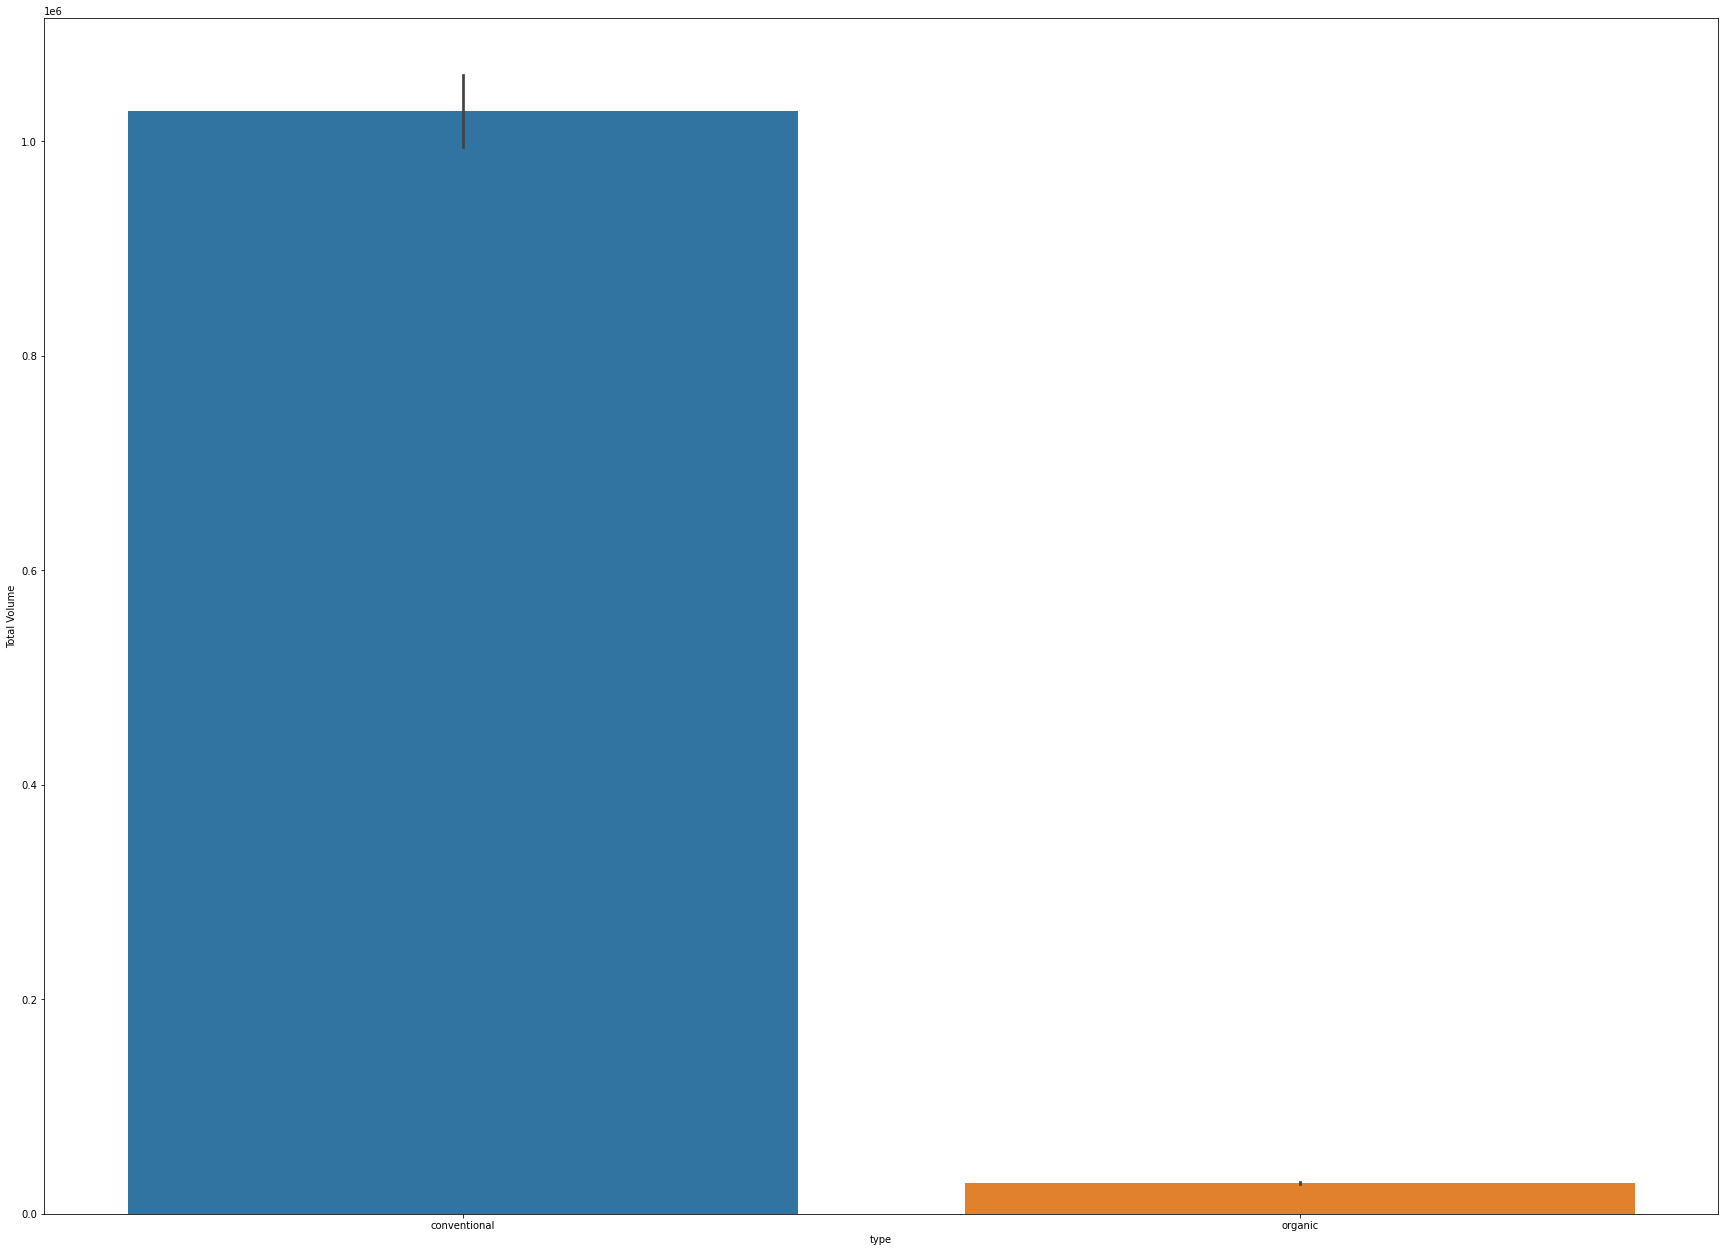

In [145]:
fig, ax = plt.subplots(figsize=(30, 22))
ax = sns.barplot(x="type", y="Total Volume", data=df)

In [146]:
dfo = df[df['type'] == 'organic']

[Text(0, 0, '2015-01-31'),
 Text(1, 0, '2015-02-28'),
 Text(2, 0, '2015-03-31'),
 Text(3, 0, '2015-04-30'),
 Text(4, 0, '2015-05-31'),
 Text(5, 0, '2015-06-30'),
 Text(6, 0, '2015-07-31'),
 Text(7, 0, '2015-08-31'),
 Text(8, 0, '2015-09-30'),
 Text(9, 0, '2015-10-31'),
 Text(10, 0, '2015-11-30'),
 Text(11, 0, '2015-12-31'),
 Text(12, 0, '2016-01-31'),
 Text(13, 0, '2016-02-29'),
 Text(14, 0, '2016-03-31'),
 Text(15, 0, '2016-04-30'),
 Text(16, 0, '2016-05-31'),
 Text(17, 0, '2016-06-30'),
 Text(18, 0, '2016-07-31'),
 Text(19, 0, '2016-08-31'),
 Text(20, 0, '2016-09-30'),
 Text(21, 0, '2016-10-31'),
 Text(22, 0, '2016-11-30'),
 Text(23, 0, '2016-12-31'),
 Text(24, 0, '2017-01-31'),
 Text(25, 0, '2017-02-28'),
 Text(26, 0, '2017-03-31'),
 Text(27, 0, '2017-04-30'),
 Text(28, 0, '2017-05-31'),
 Text(29, 0, '2017-06-30'),
 Text(30, 0, '2017-07-31'),
 Text(31, 0, '2017-08-31'),
 Text(32, 0, '2017-09-30'),
 Text(33, 0, '2017-10-31'),
 Text(34, 0, '2017-11-30'),
 Text(35, 0, '2017-12-31')]

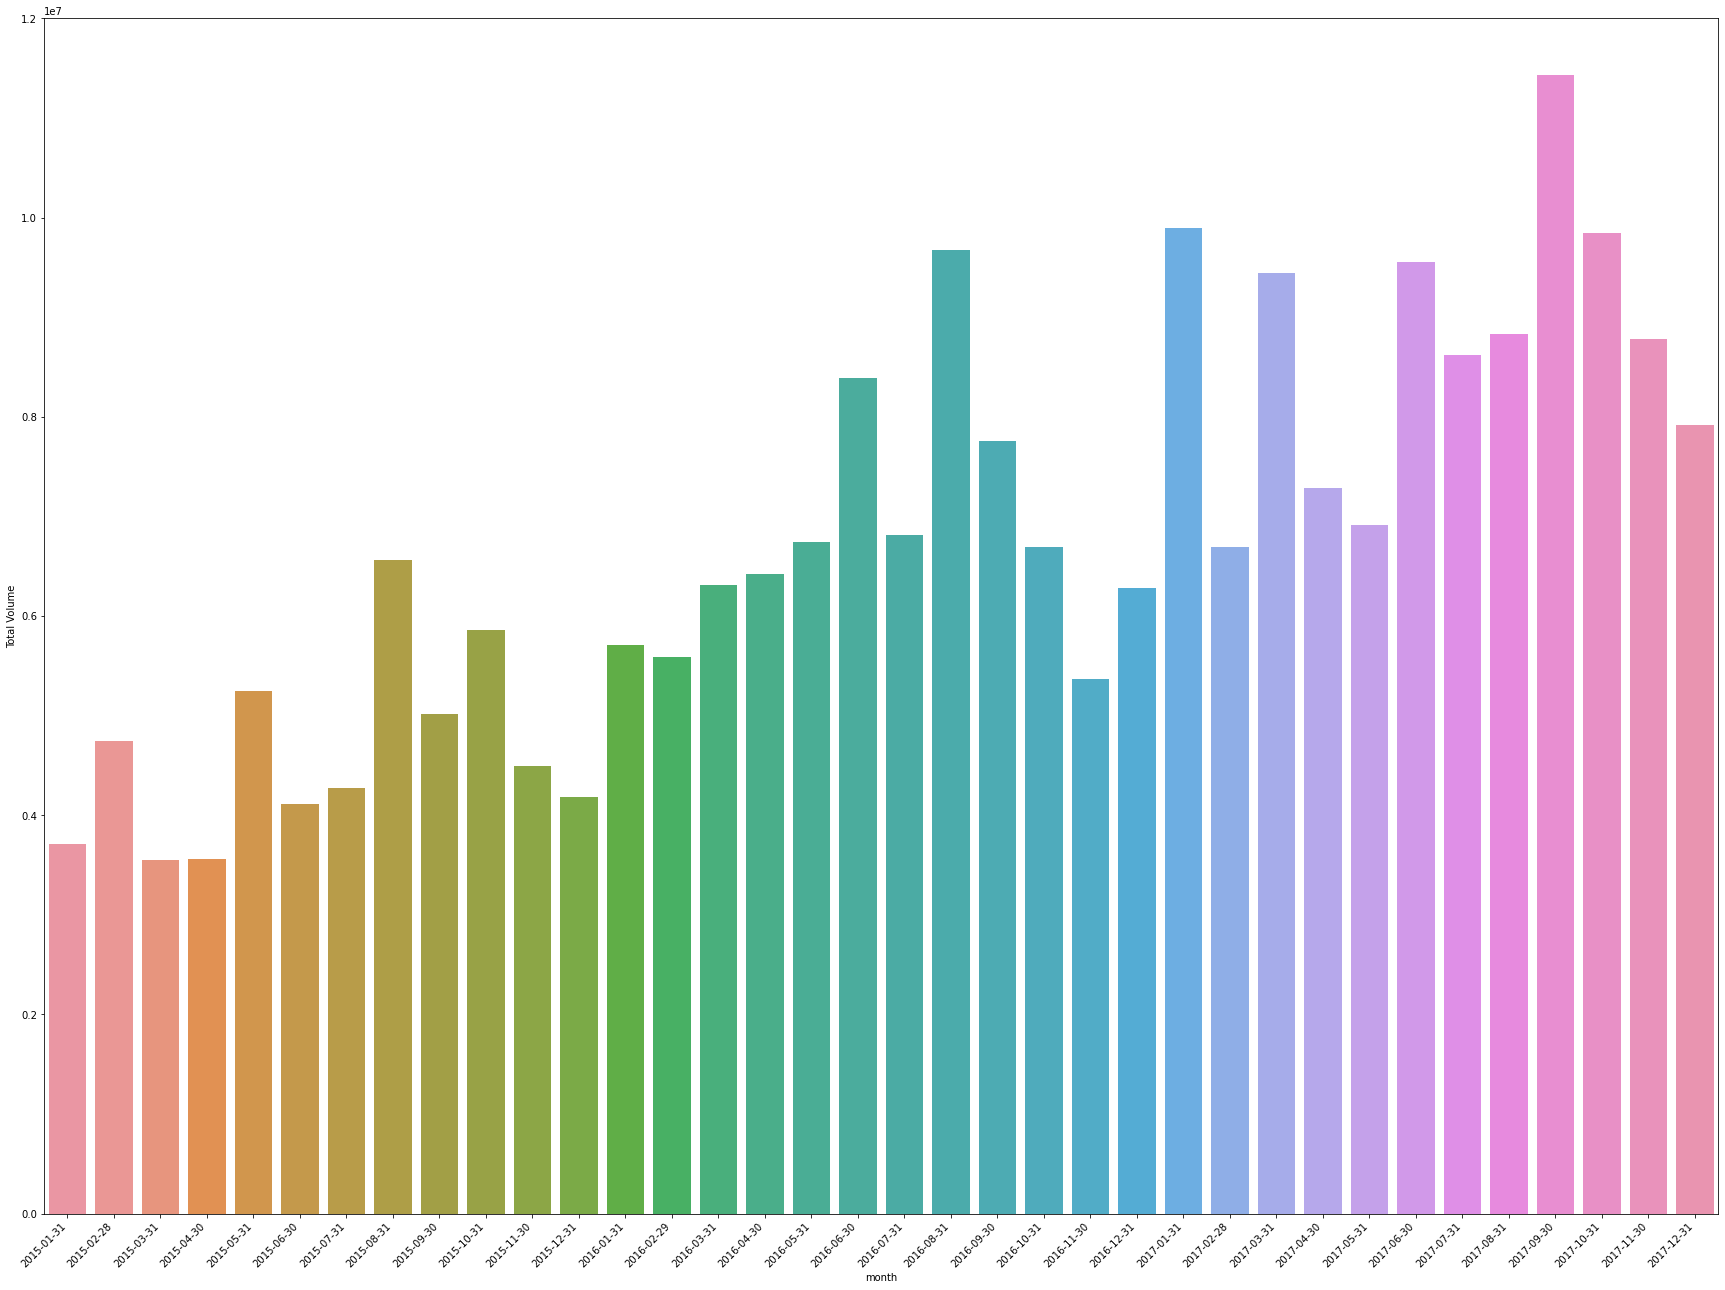

In [147]:
fig, ax = plt.subplots(figsize=(30, 22))
fig = sns.barplot(x = "month", y = "Total Volume", data = dfo, 
                  estimator = sum, ci = None, ax=ax)
x_dates = dfo['month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

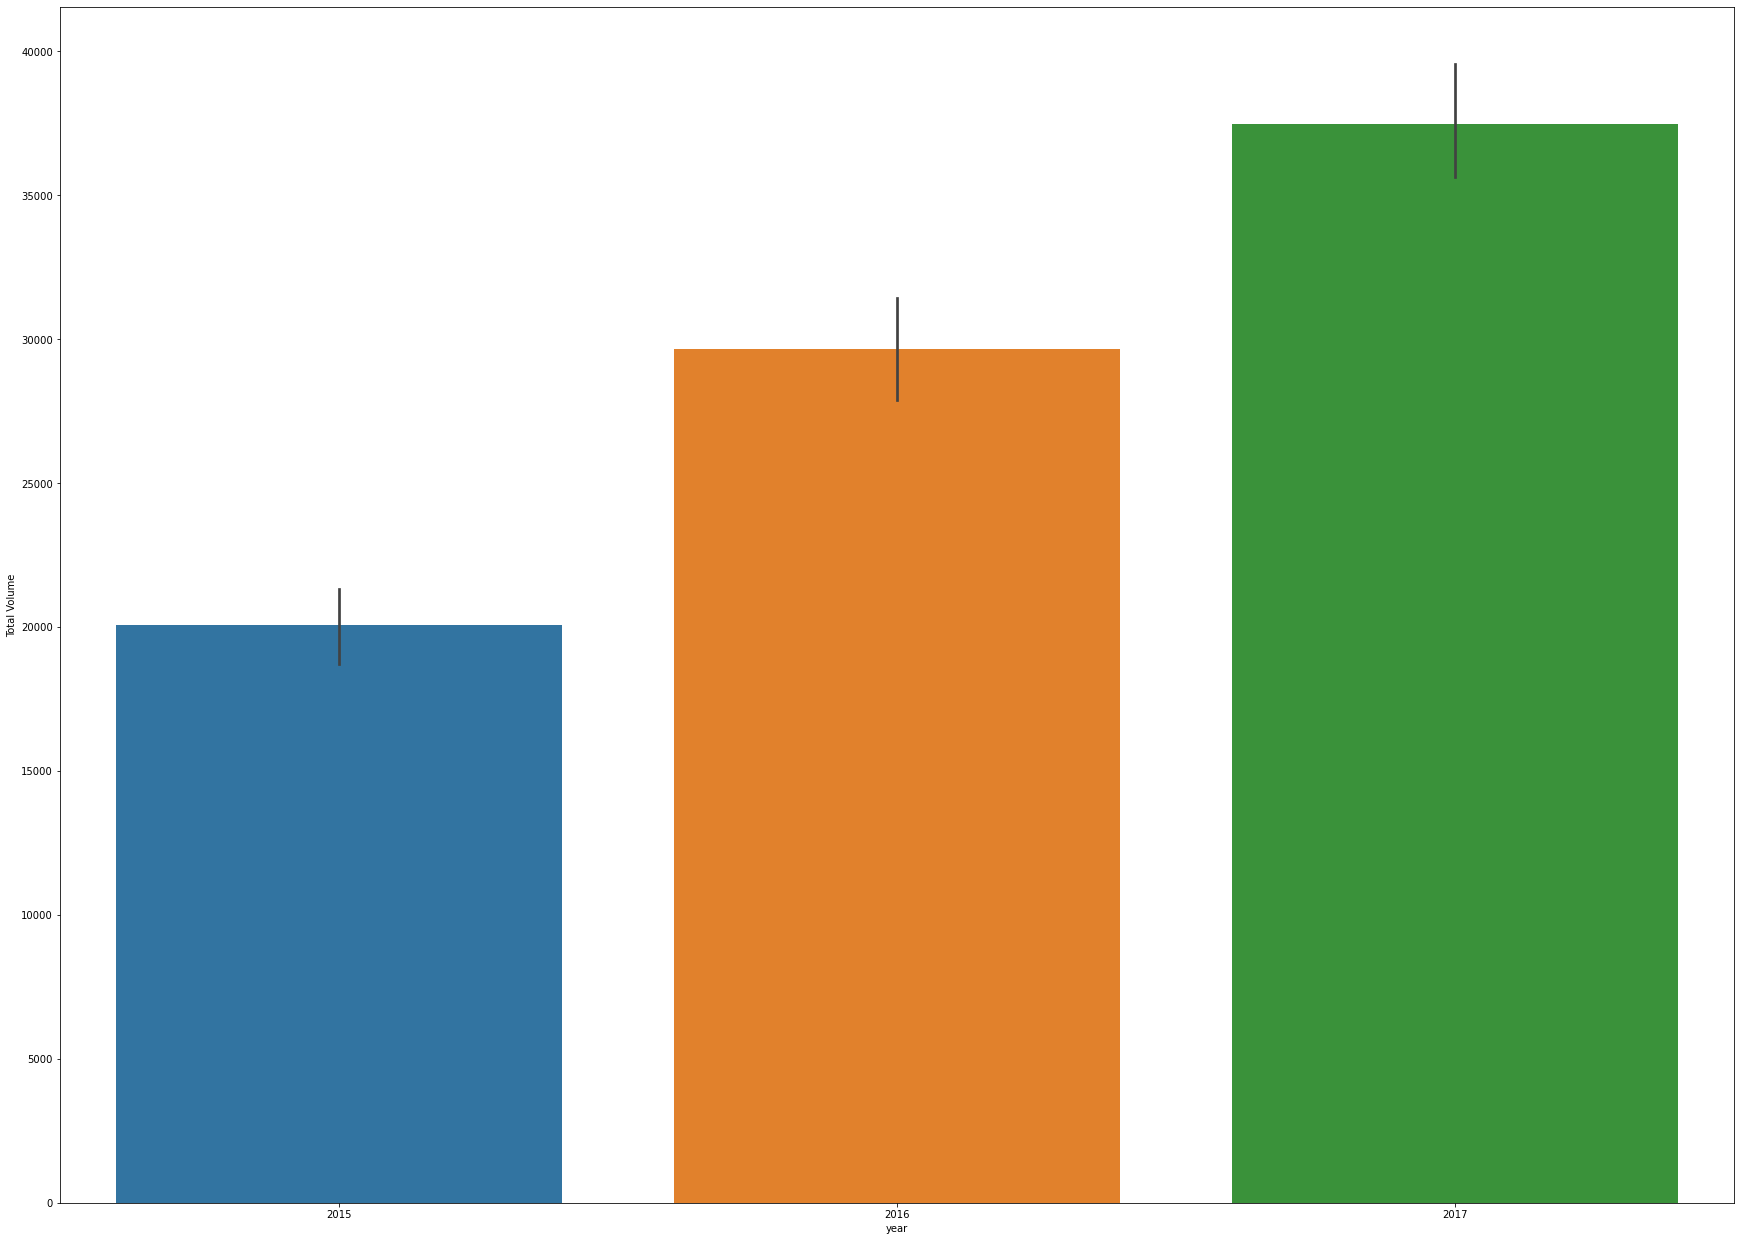

In [148]:
fig, ax = plt.subplots(figsize=(30, 22))
ax = sns.barplot(x="year", y="Total Volume", data=dfo)

[Text(0, 0, '2015-01-31'),
 Text(1, 0, '2015-02-28'),
 Text(2, 0, '2015-03-31'),
 Text(3, 0, '2015-04-30'),
 Text(4, 0, '2015-05-31'),
 Text(5, 0, '2015-06-30'),
 Text(6, 0, '2015-07-31'),
 Text(7, 0, '2015-08-31'),
 Text(8, 0, '2015-09-30'),
 Text(9, 0, '2015-10-31'),
 Text(10, 0, '2015-11-30'),
 Text(11, 0, '2015-12-31'),
 Text(12, 0, '2016-01-31'),
 Text(13, 0, '2016-02-29'),
 Text(14, 0, '2016-03-31'),
 Text(15, 0, '2016-04-30'),
 Text(16, 0, '2016-05-31'),
 Text(17, 0, '2016-06-30'),
 Text(18, 0, '2016-07-31'),
 Text(19, 0, '2016-08-31'),
 Text(20, 0, '2016-09-30'),
 Text(21, 0, '2016-10-31'),
 Text(22, 0, '2016-11-30'),
 Text(23, 0, '2016-12-31'),
 Text(24, 0, '2017-01-31'),
 Text(25, 0, '2017-02-28'),
 Text(26, 0, '2017-03-31'),
 Text(27, 0, '2017-04-30'),
 Text(28, 0, '2017-05-31'),
 Text(29, 0, '2017-06-30'),
 Text(30, 0, '2017-07-31'),
 Text(31, 0, '2017-08-31'),
 Text(32, 0, '2017-09-30'),
 Text(33, 0, '2017-10-31'),
 Text(34, 0, '2017-11-30'),
 Text(35, 0, '2017-12-31')]

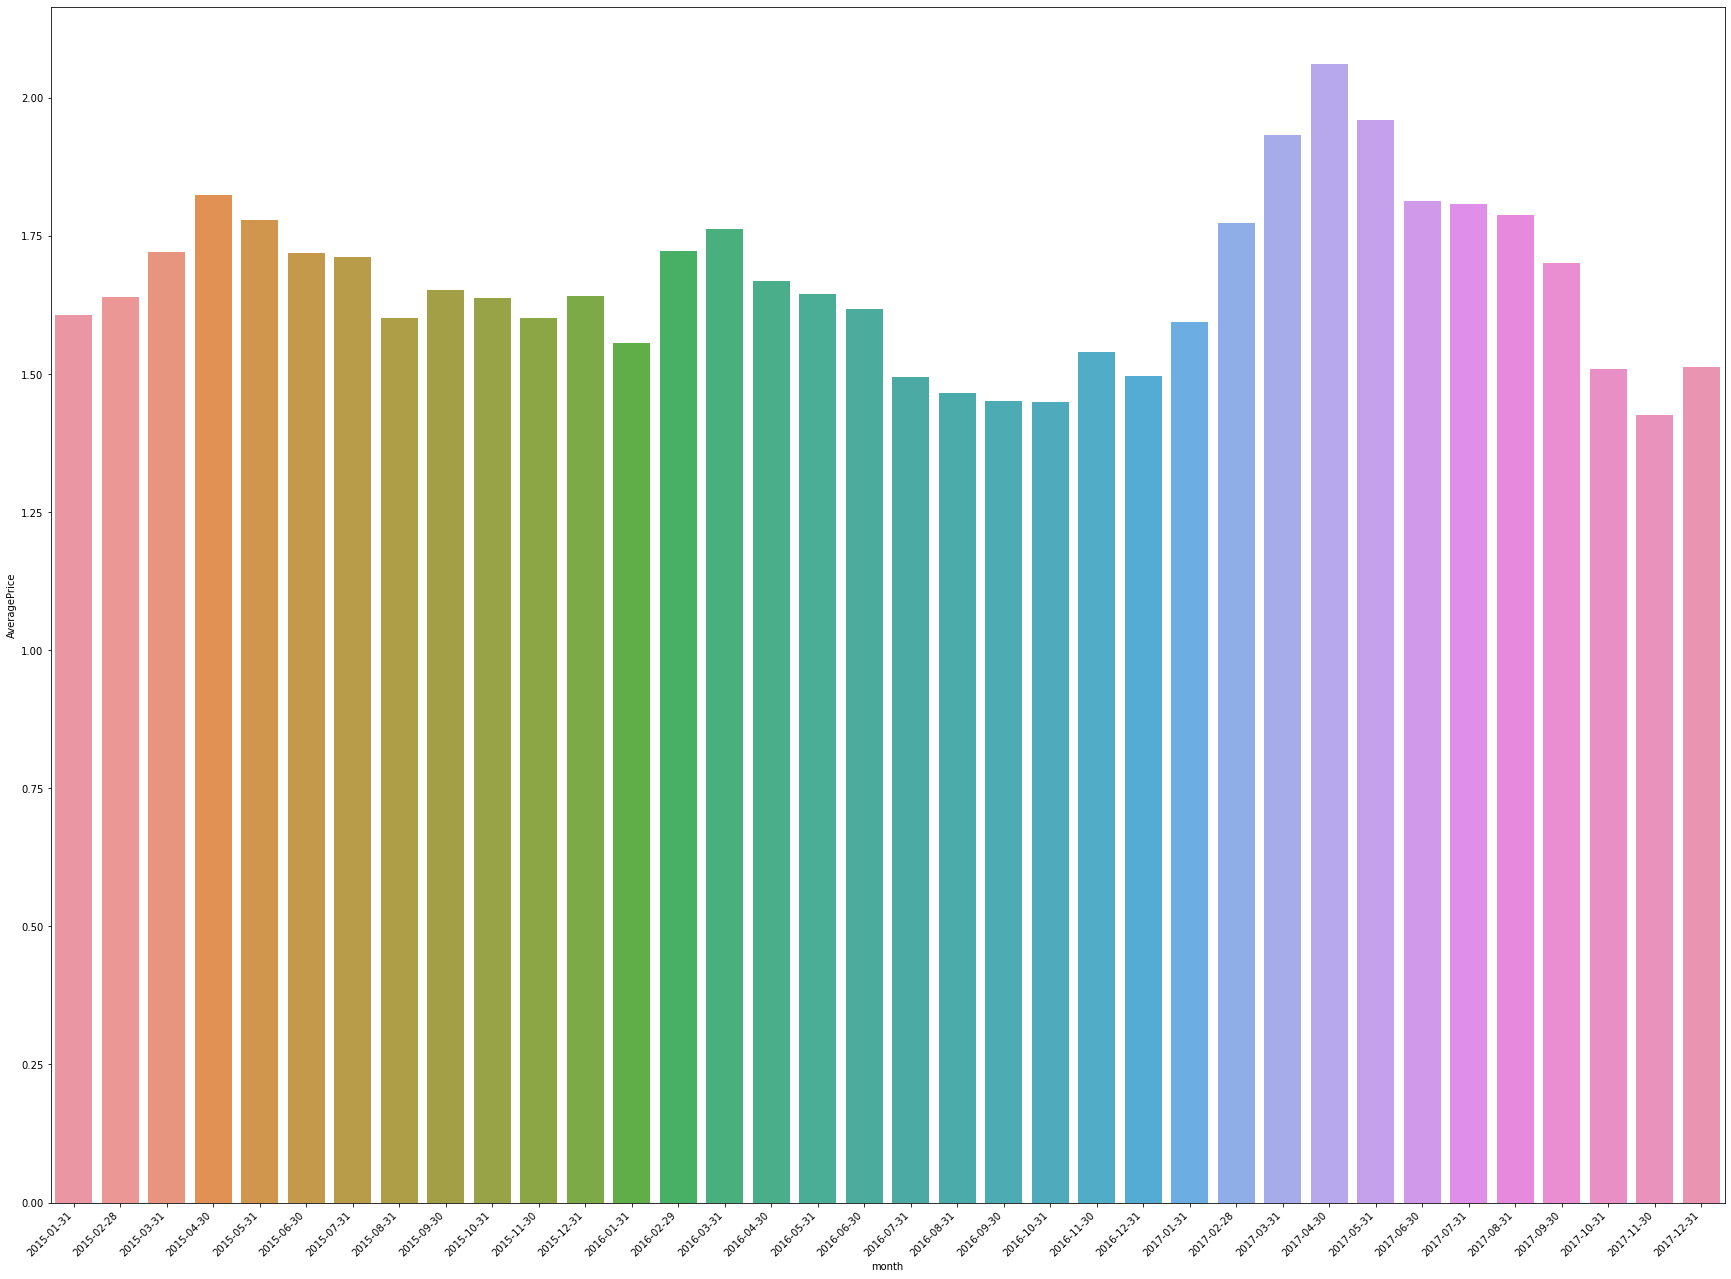

In [168]:
fig, ax = plt.subplots(figsize=(30, 22))
fig = sns.barplot(x = "month", y = "AveragePrice", data = dfo, 
                  ci = None, ax=ax)
x_dates = dfo['month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

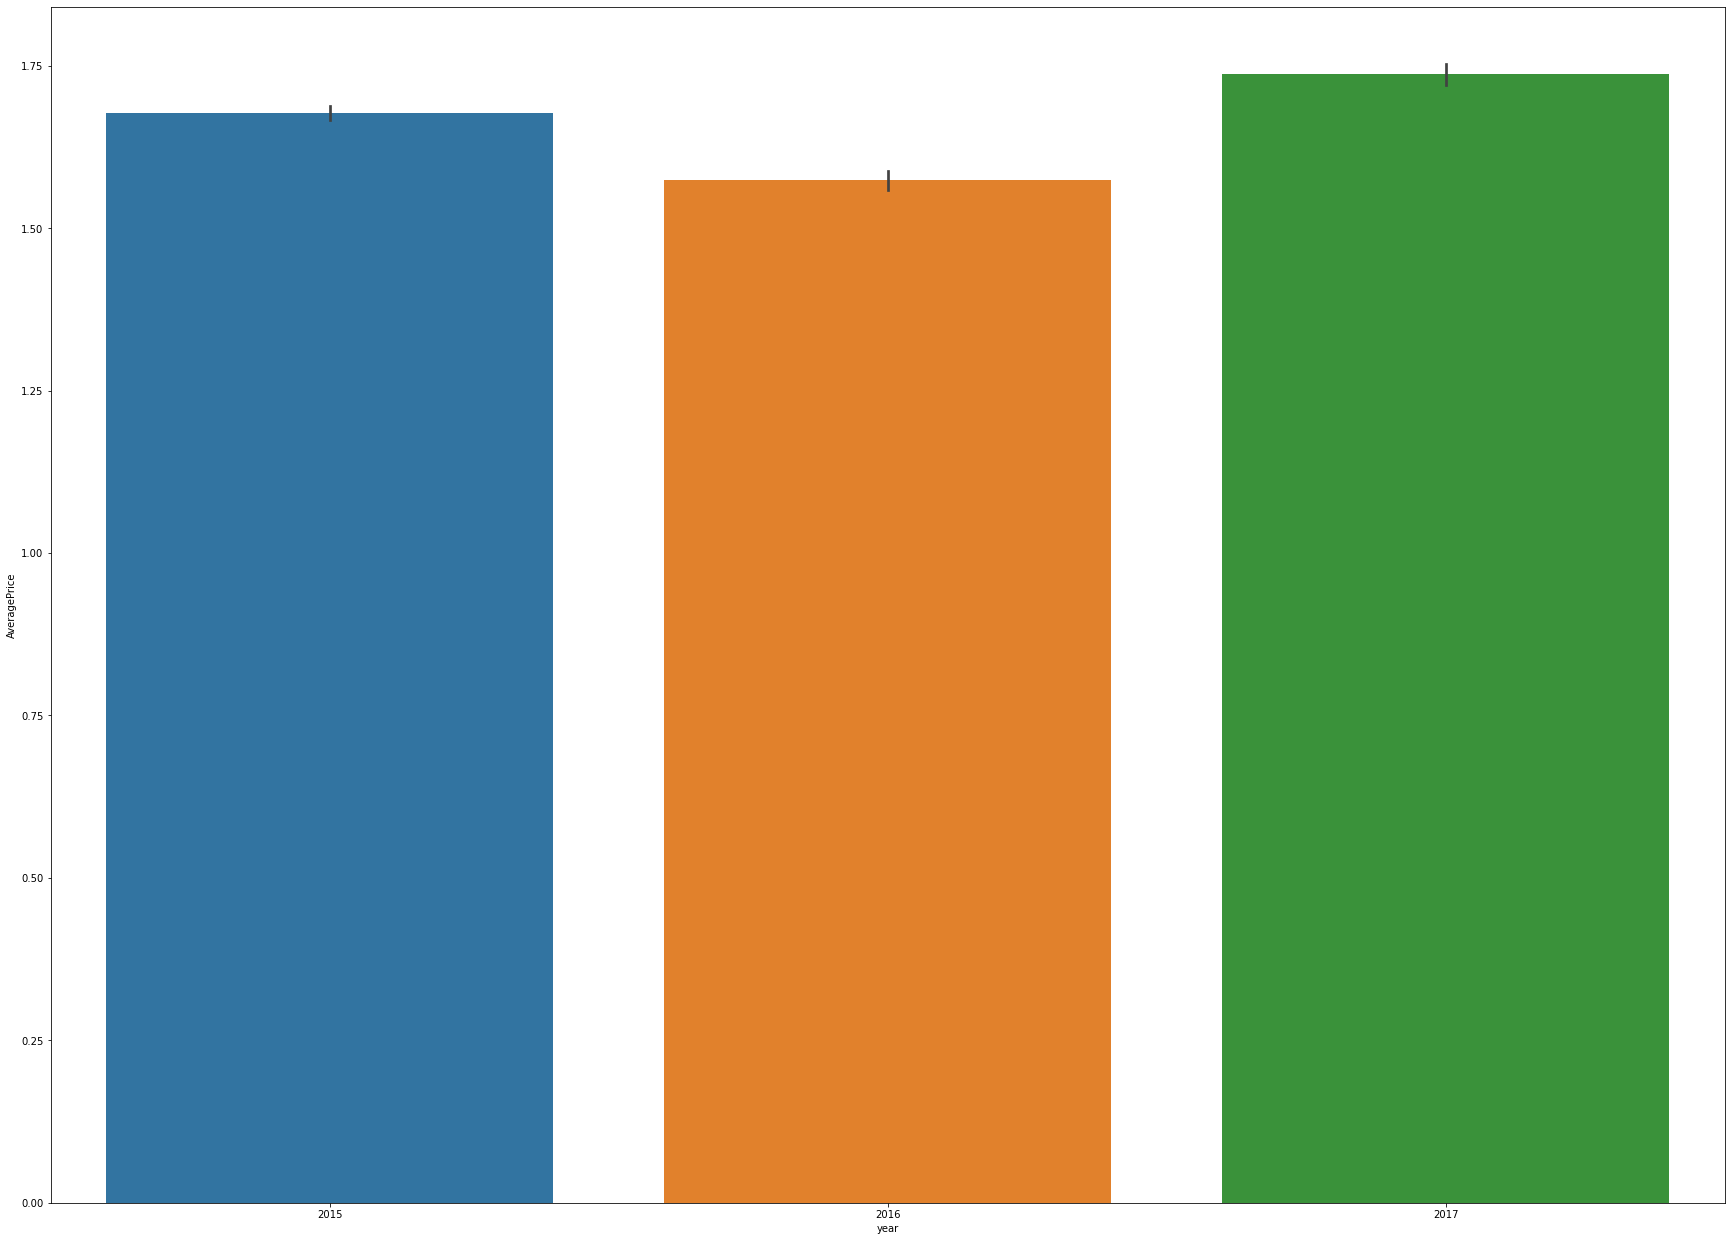

In [150]:
fig, ax = plt.subplots(figsize=(30, 22))
ax = sns.barplot(x="year", y="AveragePrice", data=dfo)

In [151]:
dfc = df[df['type'] != 'organic']

[Text(0, 0, '2015-01-31'),
 Text(1, 0, '2015-02-28'),
 Text(2, 0, '2015-03-31'),
 Text(3, 0, '2015-04-30'),
 Text(4, 0, '2015-05-31'),
 Text(5, 0, '2015-06-30'),
 Text(6, 0, '2015-07-31'),
 Text(7, 0, '2015-08-31'),
 Text(8, 0, '2015-09-30'),
 Text(9, 0, '2015-10-31'),
 Text(10, 0, '2015-11-30'),
 Text(11, 0, '2015-12-31'),
 Text(12, 0, '2016-01-31'),
 Text(13, 0, '2016-02-29'),
 Text(14, 0, '2016-03-31'),
 Text(15, 0, '2016-04-30'),
 Text(16, 0, '2016-05-31'),
 Text(17, 0, '2016-06-30'),
 Text(18, 0, '2016-07-31'),
 Text(19, 0, '2016-08-31'),
 Text(20, 0, '2016-09-30'),
 Text(21, 0, '2016-10-31'),
 Text(22, 0, '2016-11-30'),
 Text(23, 0, '2016-12-31'),
 Text(24, 0, '2017-01-31'),
 Text(25, 0, '2017-02-28'),
 Text(26, 0, '2017-03-31'),
 Text(27, 0, '2017-04-30'),
 Text(28, 0, '2017-05-31'),
 Text(29, 0, '2017-06-30'),
 Text(30, 0, '2017-07-31'),
 Text(31, 0, '2017-08-31'),
 Text(32, 0, '2017-09-30'),
 Text(33, 0, '2017-10-31'),
 Text(34, 0, '2017-11-30'),
 Text(35, 0, '2017-12-31')]

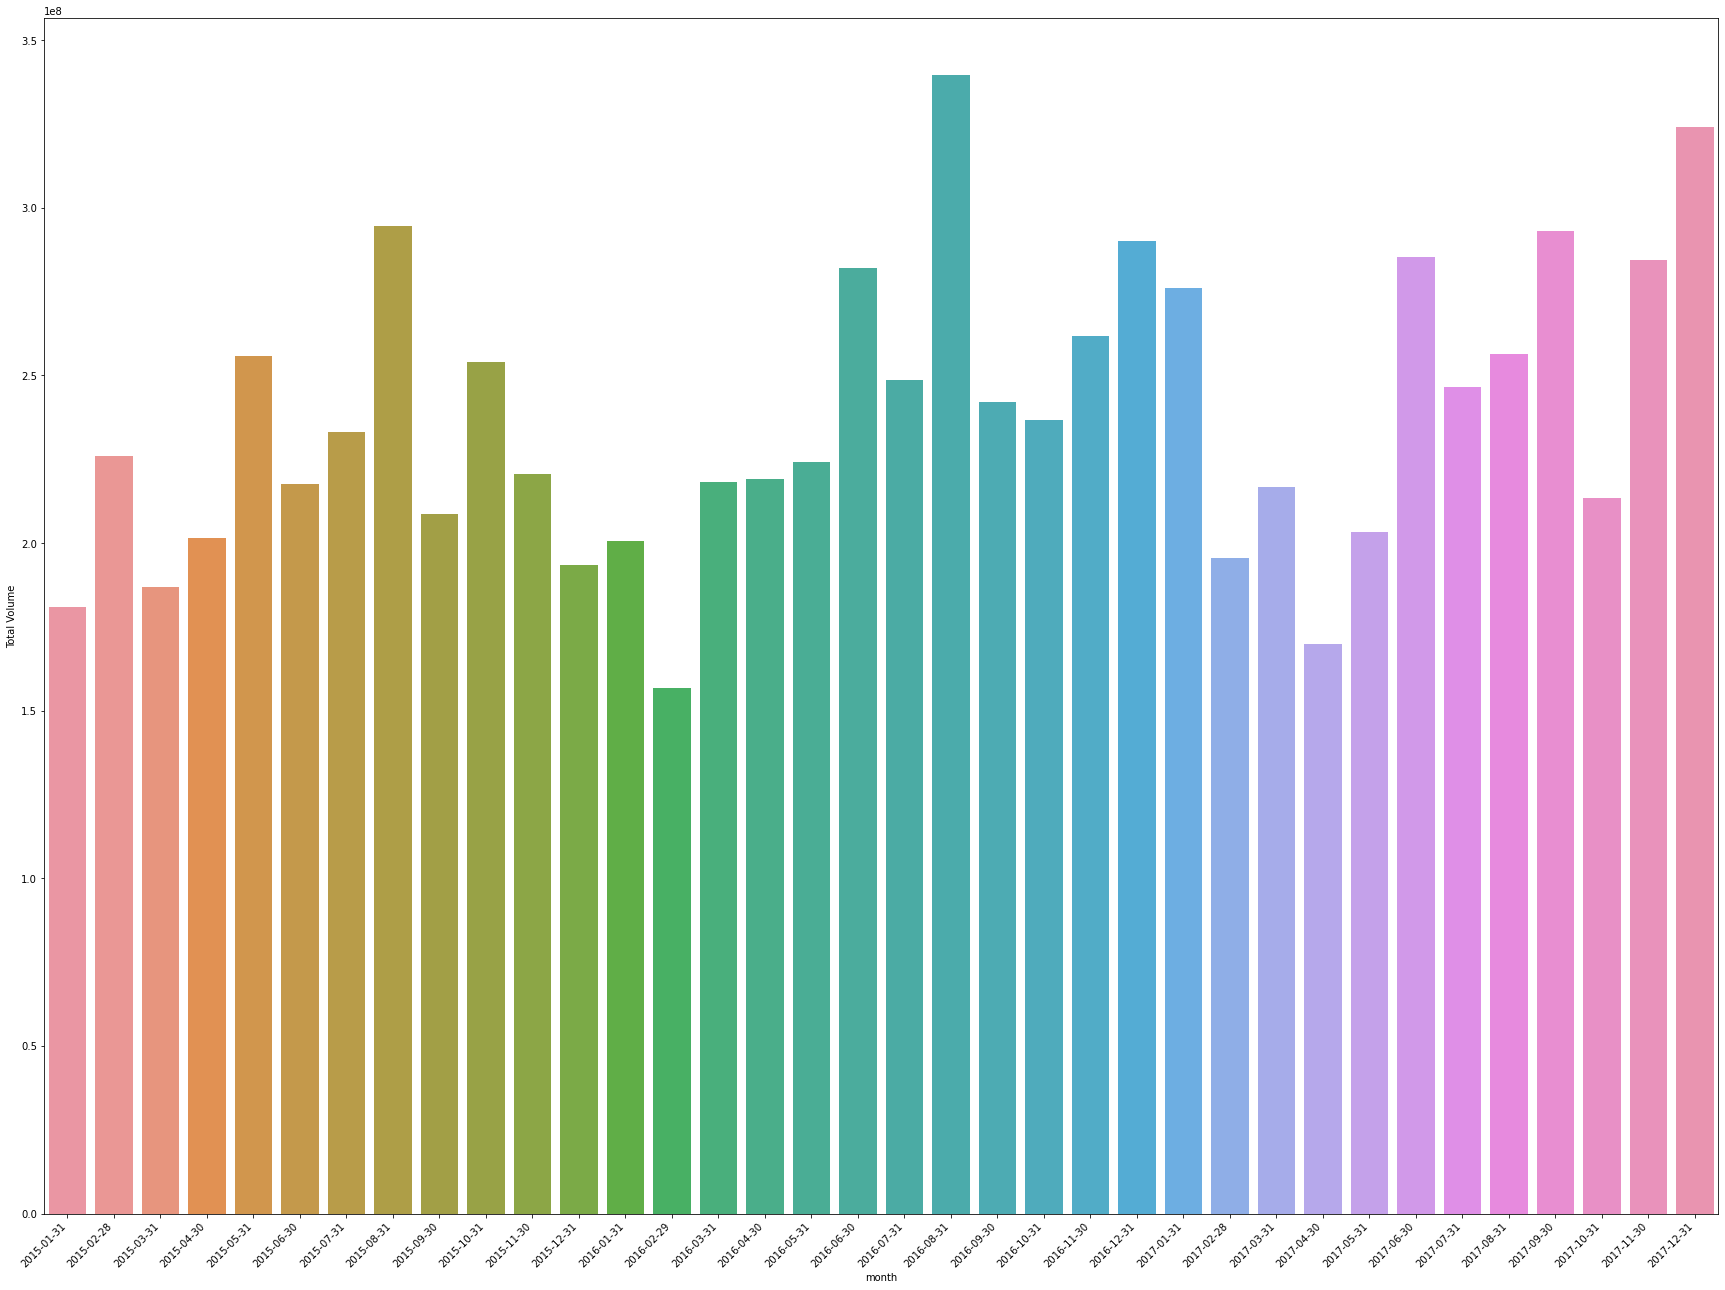

In [152]:
fig, ax = plt.subplots(figsize=(30, 22))
fig = sns.barplot(x = "month", y = "Total Volume", data = dfc, 
                  estimator = sum, ci = None, ax=ax)
x_dates = dfc['month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')


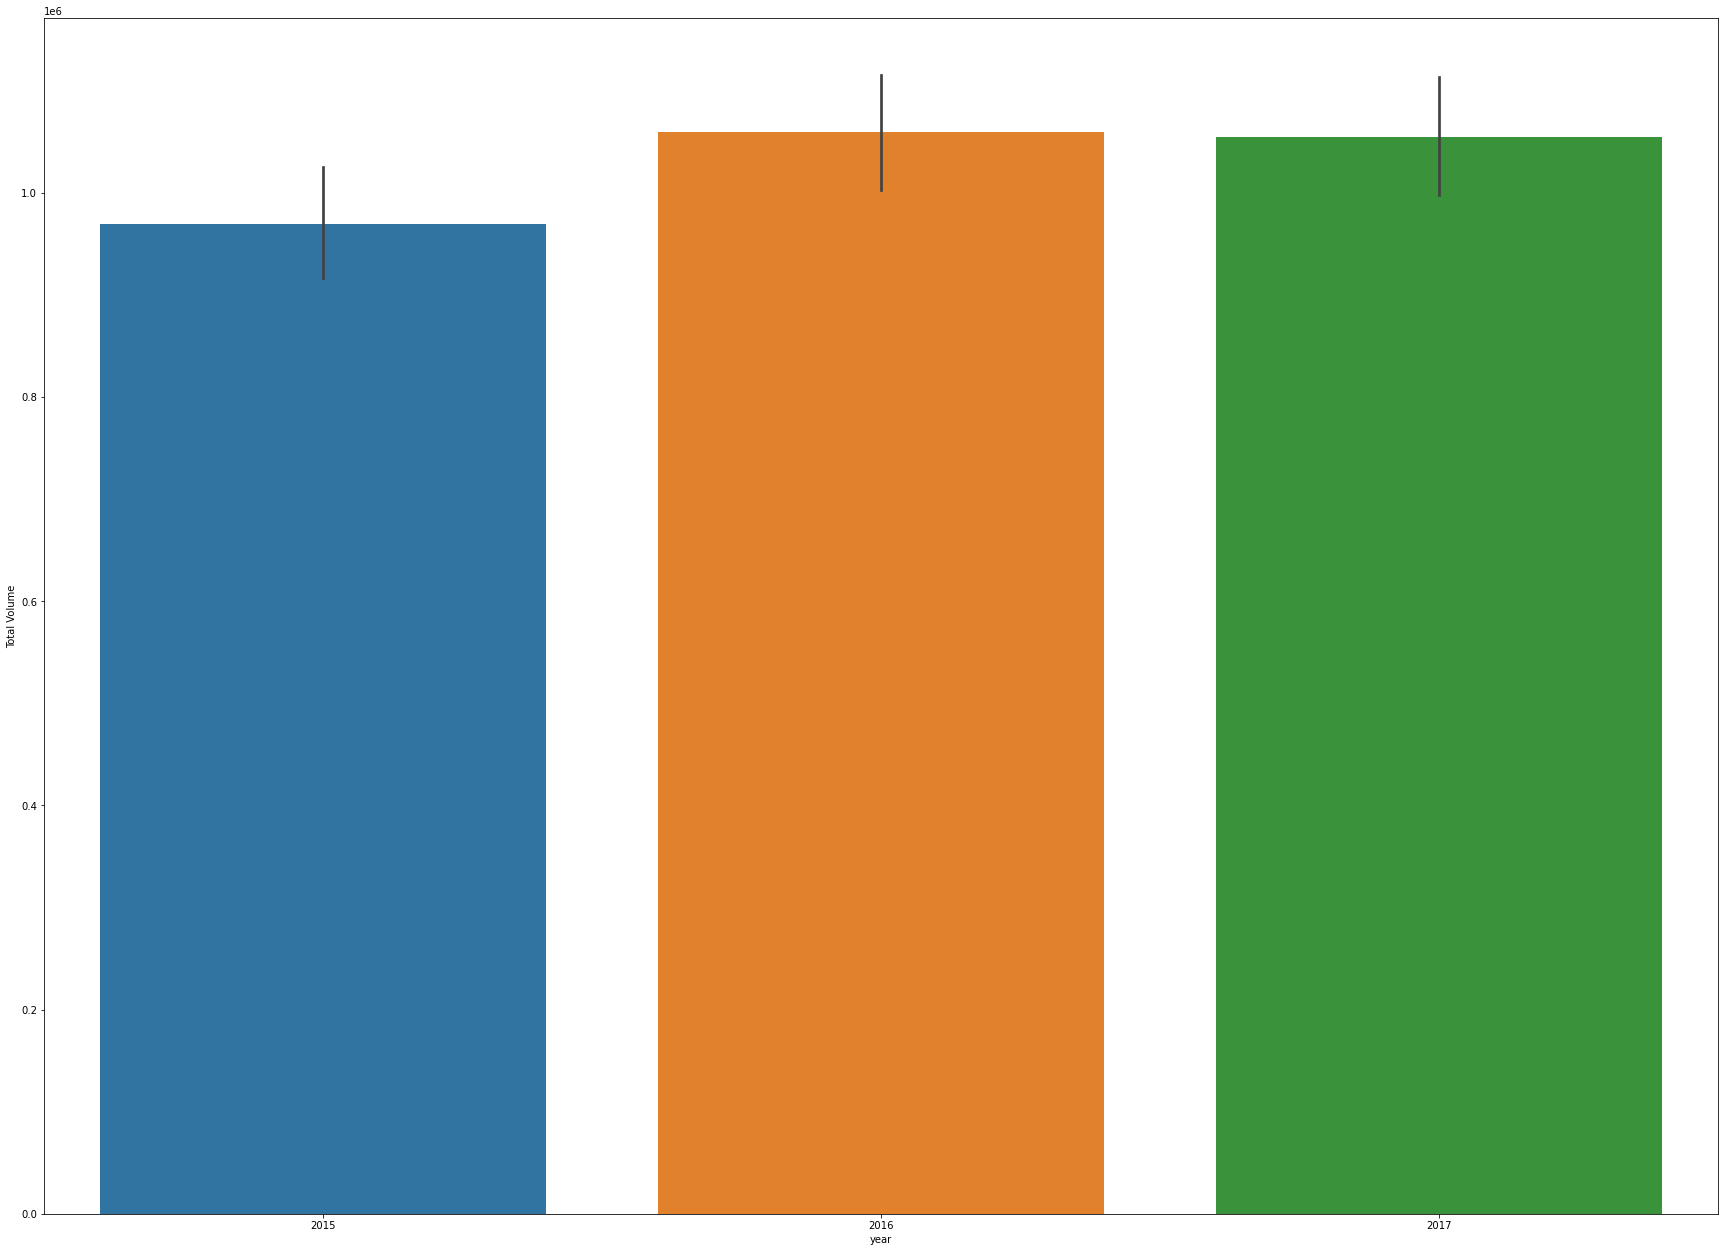

In [153]:
fig, ax = plt.subplots(figsize=(30, 22))
ax = sns.barplot(x="year", y="Total Volume", data=dfc)

[Text(0, 0, '2015-01-31'),
 Text(1, 0, '2015-02-28'),
 Text(2, 0, '2015-03-31'),
 Text(3, 0, '2015-04-30'),
 Text(4, 0, '2015-05-31'),
 Text(5, 0, '2015-06-30'),
 Text(6, 0, '2015-07-31'),
 Text(7, 0, '2015-08-31'),
 Text(8, 0, '2015-09-30'),
 Text(9, 0, '2015-10-31'),
 Text(10, 0, '2015-11-30'),
 Text(11, 0, '2015-12-31'),
 Text(12, 0, '2016-01-31'),
 Text(13, 0, '2016-02-29'),
 Text(14, 0, '2016-03-31'),
 Text(15, 0, '2016-04-30'),
 Text(16, 0, '2016-05-31'),
 Text(17, 0, '2016-06-30'),
 Text(18, 0, '2016-07-31'),
 Text(19, 0, '2016-08-31'),
 Text(20, 0, '2016-09-30'),
 Text(21, 0, '2016-10-31'),
 Text(22, 0, '2016-11-30'),
 Text(23, 0, '2016-12-31'),
 Text(24, 0, '2017-01-31'),
 Text(25, 0, '2017-02-28'),
 Text(26, 0, '2017-03-31'),
 Text(27, 0, '2017-04-30'),
 Text(28, 0, '2017-05-31'),
 Text(29, 0, '2017-06-30'),
 Text(30, 0, '2017-07-31'),
 Text(31, 0, '2017-08-31'),
 Text(32, 0, '2017-09-30'),
 Text(33, 0, '2017-10-31'),
 Text(34, 0, '2017-11-30'),
 Text(35, 0, '2017-12-31')]

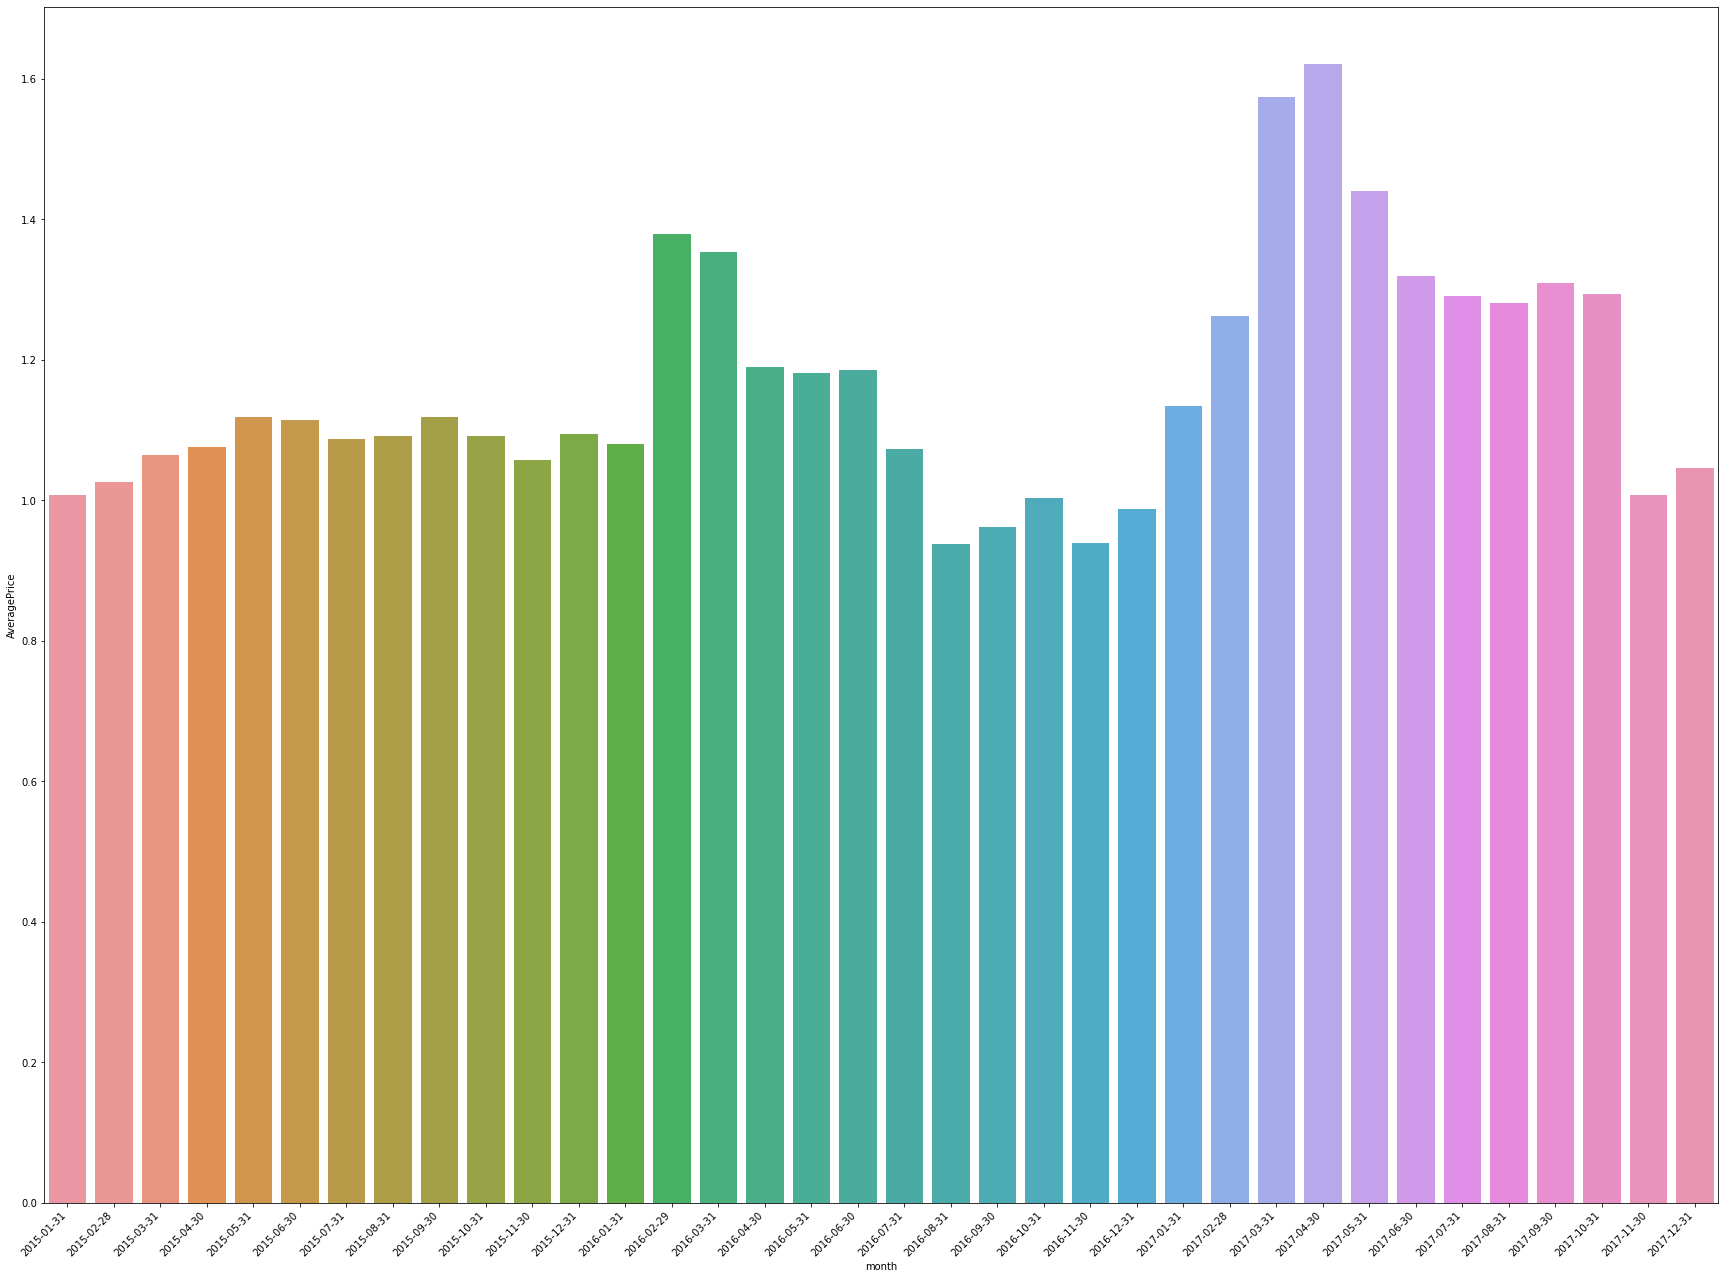

In [169]:
fig, ax = plt.subplots(figsize=(30, 22))
fig = sns.barplot(x = "month", y = "AveragePrice", data = dfc, 
                  ci = None, ax=ax)
x_dates = dfc['month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

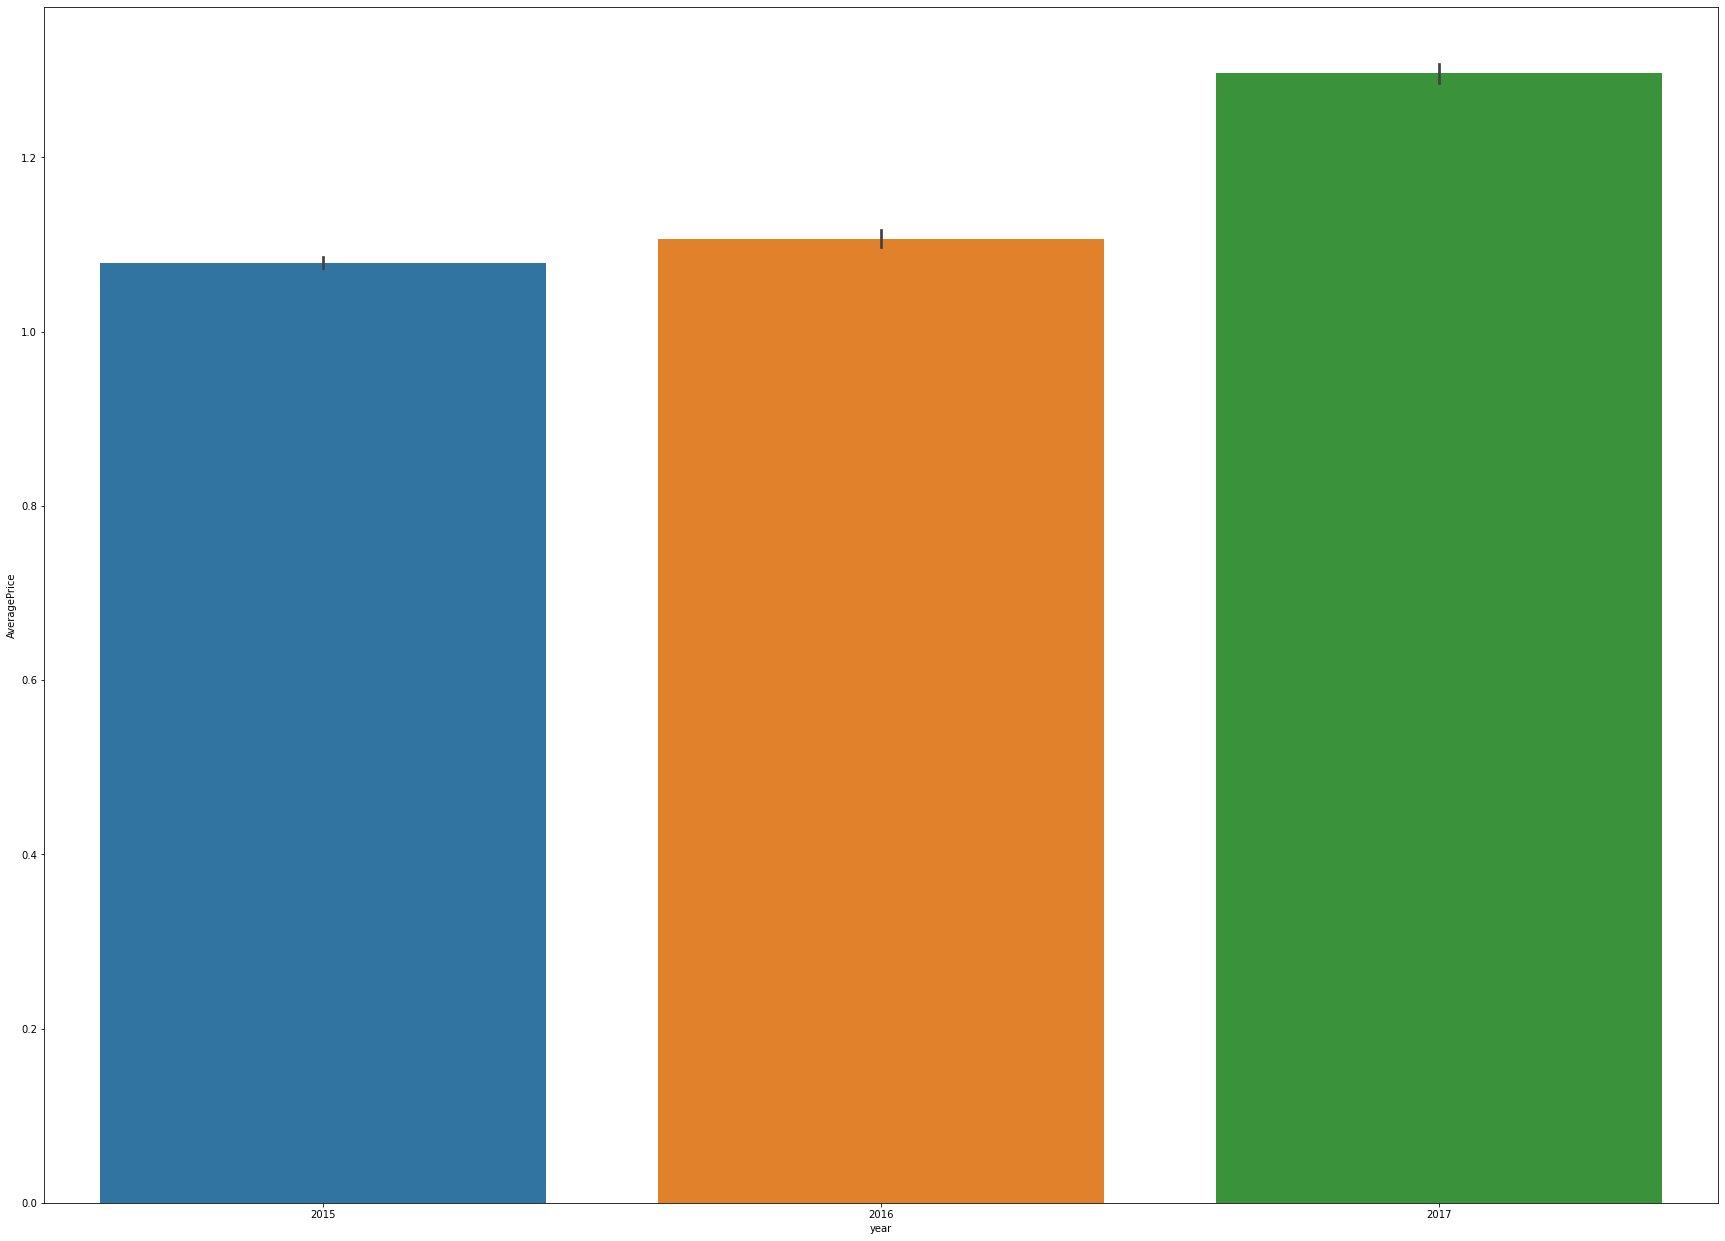

In [170]:
fig, ax = plt.subplots(figsize=(30, 22))
ax = sns.barplot(x="year", y="AveragePrice", data=dfc)

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

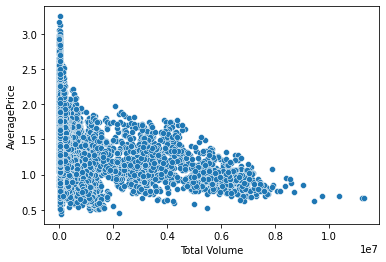

In [154]:
sns.scatterplot(data=df, x="Total Volume", y="AveragePrice")

In [155]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
17596,46,2017-01-29,1.30,17839.37,1486.34,4498.48,26.12,11828.43,11821.76,6.67,0.0,organic,2017,WestTexNewMexico,2017-01
17597,47,2017-01-22,1.21,16430.64,1413.93,2820.53,20.25,12175.93,12073.07,102.86,0.0,organic,2017,WestTexNewMexico,2017-01
17598,48,2017-01-15,1.19,17014.23,1203.87,2904.22,23.07,12883.07,12476.57,406.50,0.0,organic,2017,WestTexNewMexico,2017-01
17599,49,2017-01-08,1.18,14375.39,1327.98,2617.20,5.75,10424.46,10283.85,140.61,0.0,organic,2017,WestTexNewMexico,2017-01
17600,50,2017-01-01,1.28,15307.87,867.66,3434.02,37.30,10968.89,10815.88,153.01,0.0,organic,2017,WestTexNewMexico,2017-01


In [156]:

bags = df.groupby('year')[["Small Bags", 'Large Bags', 'XLarge Bags']].sum()

In [157]:
bags.transpose()

year,2015,2016,2017
Small Bags,3.962535e+08,6.956460e+08,7.649315e+08
Large Bags,8.200384e+07,2.108520e+08,2.487844e+08
XLarge Bags,3.385385e+06,1.251301e+07,1.490833e+07


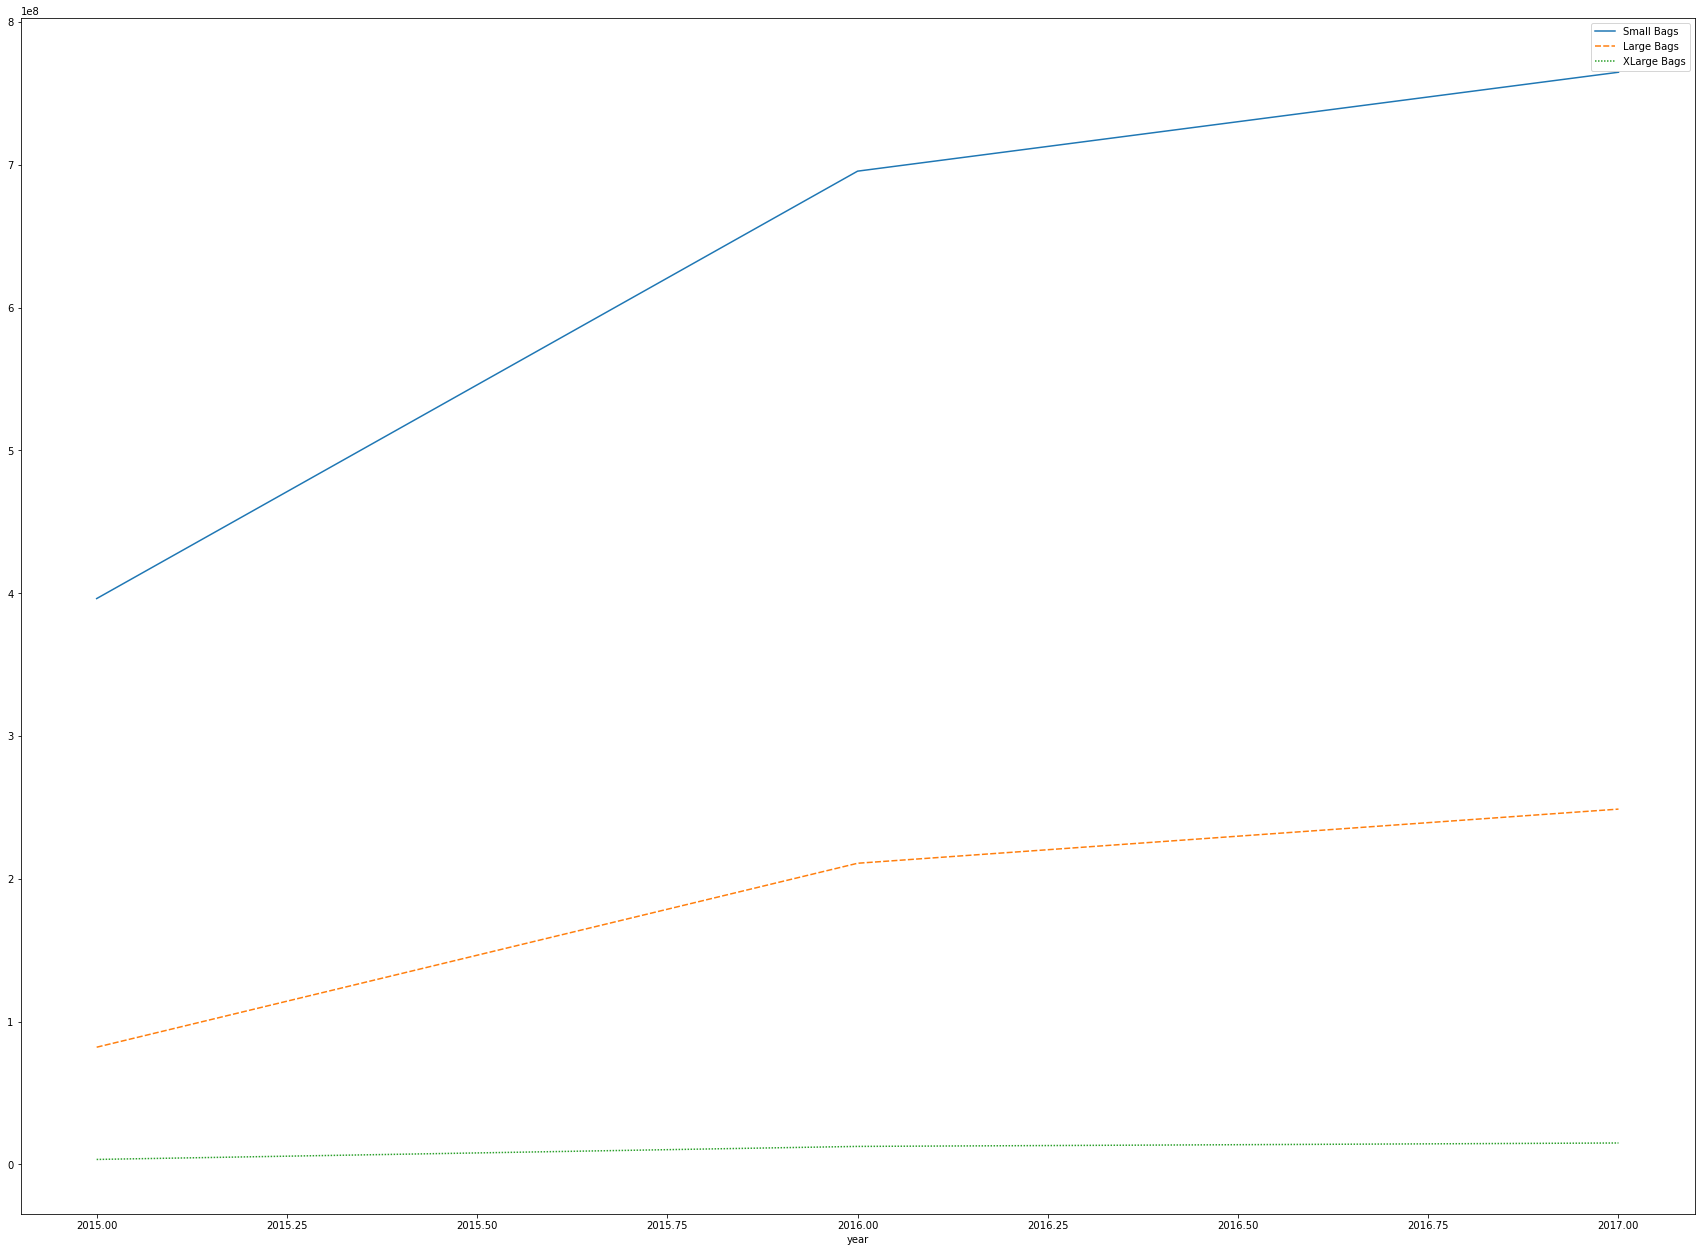

In [158]:
fig, ax = plt.subplots(figsize=(30, 22))
ax = sns.lineplot(data=bags)

In [159]:
bags.tail()

,Small Bags,Large Bags,XLarge Bags
year,,,
2015,3.962535e+08,8.200384e+07,3385385.08
2016,6.956460e+08,2.108520e+08,12513008.81
2017,7.649315e+08,2.487844e+08,14908332.61
